In [3]:
# Import Libraries

# Visualization Library
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Pre-processing Data Library
import pandas as pd
import numpy as np
from sklearn.preprocessing import FunctionTransformer, StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Machine Learning Tuning Library
from sklearn.model_selection import train_test_split, KFold, GridSearchCV, RandomizedSearchCV, cross_val_score
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, classification_report, confusion_matrix, roc_curve, auc, precision_recall_curve, average_precision_score

# Machine Learning Library
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier, plot_importance


# Step 1 : Download Dataset

## Train Dataset

In [4]:
train_df = pd.read_csv("train.csv")

train_df

id  person_age  person_income person_home_ownership  \
0          0          37          35000                  RENT   
1          1          22          56000                   OWN   
2          2          29          28800                   OWN   
3          3          30          70000                  RENT   
4          4          22          60000                  RENT   
...      ...         ...            ...                   ...   
58640  58640          34         120000              MORTGAGE   
58641  58641          28          28800                  RENT   
58642  58642          23          44000                  RENT   
58643  58643          22          30000                  RENT   
58644  58644          31          75000              MORTGAGE   

       person_emp_length loan_intent loan_grade  loan_amnt  loan_int_rate  \
0                    0.0   EDUCATION          B       6000          11.49   
1                    6.0     MEDICAL          C       4000          13.35   
2                    8.0    PERSONAL          A       6000           8.90   
3                   14.0     VENTURE          B      12000          11.11   
4                    2.0     MEDICAL          A       6000           6.92   
...                  ...         ...        ...        ...            ...   
58640                5.0   EDUCATION          D      25000          15.95   
58641                0.0     MEDICAL          C      10000          12.73   
58642                7.0   EDUCATION          D       6800          16.00   
58643                2.0   EDUCATION          A       5000           8.90   
58644                2.0     VENTURE          B      15000          11.11   

       loan_percent_income cb_person_default_on_file  \
0                     0.17                         N   
1                     0.07                         N   
2                     0.21                         N   
3                     0.17                         N   
4                     0.10                         N   
...                    ...                       ...   
58640                 0.21                         Y   
58641                 0.35                         N   
58642                 0.15                         N   
58643                 0.17                         N   
58644                 0.20                         N   

       cb_person_cred_hist_length  loan_status  
0                              14            0  
1                               2            0  
2                              10            0  
3                               5            0  
4                               3            0  
...                           ...          ...  
58640                          10            0  
58641                           8            1  
58642                           2            1  
58643                           3            0  
58644                           5            0  

[58645 rows x 13 columns]

In [5]:
train_df.isna().sum()

id                            0
person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
loan_status                   0
dtype: int64

In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58645 entries, 0 to 58644
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          58645 non-null  int64  
 1   person_age                  58645 non-null  int64  
 2   person_income               58645 non-null  int64  
 3   person_home_ownership       58645 non-null  object 
 4   person_emp_length           58645 non-null  float64
 5   loan_intent                 58645 non-null  object 
 6   loan_grade                  58645 non-null  object 
 7   loan_amnt                   58645 non-null  int64  
 8   loan_int_rate               58645 non-null  float64
 9   loan_percent_income         58645 non-null  float64
 10  cb_person_default_on_file   58645 non-null  object 
 11  cb_person_cred_hist_length  58645 non-null  int64  
 12  loan_status                 58645 non-null  int64  
dtypes: float64(3), int64(6), object

## Test Dataset

In [7]:
test_df = pd.read_csv("test.csv")

test_df

id  person_age  person_income person_home_ownership  \
0      58645          23          69000                  RENT   
1      58646          26          96000              MORTGAGE   
2      58647          26          30000                  RENT   
3      58648          33          50000                  RENT   
4      58649          26         102000              MORTGAGE   
...      ...         ...            ...                   ...   
39093  97738          22          31200              MORTGAGE   
39094  97739          22          48000              MORTGAGE   
39095  97740          51          60000              MORTGAGE   
39096  97741          22          36000              MORTGAGE   
39097  97742          31          45000                  RENT   

       person_emp_length        loan_intent loan_grade  loan_amnt  \
0                    3.0    HOMEIMPROVEMENT          F      25000   
1                    6.0           PERSONAL          C      10000   
2                    5.0            VENTURE          E       4000   
3                    4.0  DEBTCONSOLIDATION          A       7000   
4                    8.0    HOMEIMPROVEMENT          D      15000   
...                  ...                ...        ...        ...   
39093                2.0  DEBTCONSOLIDATION          B       3000   
39094                6.0          EDUCATION          A       7000   
39095                0.0           PERSONAL          A      15000   
39096                4.0           PERSONAL          D      14000   
39097                6.0  DEBTCONSOLIDATION          B      19450   

       loan_int_rate  loan_percent_income cb_person_default_on_file  \
0              15.76                 0.36                         N   
1              12.68                 0.10                         Y   
2              17.19                 0.13                         Y   
3               8.90                 0.14                         N   
4              16.32                 0.15                         Y   
...              ...                  ...                       ...   
39093          10.37                 0.10                         N   
39094           6.03                 0.15                         N   
39095           7.51                 0.25                         N   
39096          15.62                 0.39                         Y   
39097           9.91                 0.44                         N   

       cb_person_cred_hist_length  
0                               2  
1                               4  
2                               2  
3                               7  
4                               4  
...                           ...  
39093                           4  
39094                           3  
39095                          25  
39096                           4  
39097                           9  

[39098 rows x 12 columns]

In [8]:
test_df.isna().sum()

id                            0
person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64

In [9]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39098 entries, 0 to 39097
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          39098 non-null  int64  
 1   person_age                  39098 non-null  int64  
 2   person_income               39098 non-null  int64  
 3   person_home_ownership       39098 non-null  object 
 4   person_emp_length           39098 non-null  float64
 5   loan_intent                 39098 non-null  object 
 6   loan_grade                  39098 non-null  object 
 7   loan_amnt                   39098 non-null  int64  
 8   loan_int_rate               39098 non-null  float64
 9   loan_percent_income         39098 non-null  float64
 10  cb_person_default_on_file   39098 non-null  object 
 11  cb_person_cred_hist_length  39098 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.6+ MB


## Column
#### id : 
    - A unique identifier for each individual in the dataset.
#### person_age : 
    - The age of the individual.
#### person_income : 
    - The annual income of the individual in monetary units.
#### person_home_ownership : 
    - The homeownership status of the individual (e.g., RENT, OWN).
#### person_emp_length : 
    - The length of employment of the individual in years.
#### loan_intent : 
    - The purpose for which the loan was taken (e.g., EDUCATION, MEDICAL, PERSONAL).
#### loan_grade : 
    - The grade assigned to the loan based on creditworthiness (A, B, C, etc.).
#### loan_amnt : 
    - The amount of loan taken.
#### loan_int_rate : 
    - The interest rate of the loan.
#### loan_percent_income : 
    - The percentage of the individual’s income that goes towards paying the loan.
#### cb_person_default_on_file : 
     - Whether the individual has defaulted on any previous loans (Y for yes, N for no).
#### cb_person_cred_hist_length : 
    - The length of the individual's credit history in years.
#### loan_status: 
    - The status of the loan (0 for not defaulted, 1 for defaulted).

# Step 2 : Pre-process Dataset

In [10]:
loan_status_df = train_df["loan_status"].copy()

loan_status_df = loan_status_df.astype(bool)

loan_status_df.head()

0    False
1    False
2    False
3    False
4    False
Name: loan_status, dtype: bool

In [11]:
# Drop id and loan status from train dataset
train_df.drop(["id", "loan_status"], axis =1 , inplace= True)

train_df

person_age  person_income person_home_ownership  person_emp_length  \
0              37          35000                  RENT                0.0   
1              22          56000                   OWN                6.0   
2              29          28800                   OWN                8.0   
3              30          70000                  RENT               14.0   
4              22          60000                  RENT                2.0   
...           ...            ...                   ...                ...   
58640          34         120000              MORTGAGE                5.0   
58641          28          28800                  RENT                0.0   
58642          23          44000                  RENT                7.0   
58643          22          30000                  RENT                2.0   
58644          31          75000              MORTGAGE                2.0   

      loan_intent loan_grade  loan_amnt  loan_int_rate  loan_percent_income  \
0       EDUCATION          B       6000          11.49                 0.17   
1         MEDICAL          C       4000          13.35                 0.07   
2        PERSONAL          A       6000           8.90                 0.21   
3         VENTURE          B      12000          11.11                 0.17   
4         MEDICAL          A       6000           6.92                 0.10   
...           ...        ...        ...            ...                  ...   
58640   EDUCATION          D      25000          15.95                 0.21   
58641     MEDICAL          C      10000          12.73                 0.35   
58642   EDUCATION          D       6800          16.00                 0.15   
58643   EDUCATION          A       5000           8.90                 0.17   
58644     VENTURE          B      15000          11.11                 0.20   

      cb_person_default_on_file  cb_person_cred_hist_length  
0                             N                          14  
1                             N                           2  
2                             N                          10  
3                             N                           5  
4                             N                           3  
...                         ...                         ...  
58640                         Y                          10  
58641                         N                           8  
58642                         N                           2  
58643                         N                           3  
58644                         N                           5  

[58645 rows x 11 columns]

In [12]:
# Drop id from test dataset

test_df.drop("id", axis =1 , inplace= True)

test_df

person_age  person_income person_home_ownership  person_emp_length  \
0              23          69000                  RENT                3.0   
1              26          96000              MORTGAGE                6.0   
2              26          30000                  RENT                5.0   
3              33          50000                  RENT                4.0   
4              26         102000              MORTGAGE                8.0   
...           ...            ...                   ...                ...   
39093          22          31200              MORTGAGE                2.0   
39094          22          48000              MORTGAGE                6.0   
39095          51          60000              MORTGAGE                0.0   
39096          22          36000              MORTGAGE                4.0   
39097          31          45000                  RENT                6.0   

             loan_intent loan_grade  loan_amnt  loan_int_rate  \
0        HOMEIMPROVEMENT          F      25000          15.76   
1               PERSONAL          C      10000          12.68   
2                VENTURE          E       4000          17.19   
3      DEBTCONSOLIDATION          A       7000           8.90   
4        HOMEIMPROVEMENT          D      15000          16.32   
...                  ...        ...        ...            ...   
39093  DEBTCONSOLIDATION          B       3000          10.37   
39094          EDUCATION          A       7000           6.03   
39095           PERSONAL          A      15000           7.51   
39096           PERSONAL          D      14000          15.62   
39097  DEBTCONSOLIDATION          B      19450           9.91   

       loan_percent_income cb_person_default_on_file  \
0                     0.36                         N   
1                     0.10                         Y   
2                     0.13                         Y   
3                     0.14                         N   
4                     0.15                         Y   
...                    ...                       ...   
39093                 0.10                         N   
39094                 0.15                         N   
39095                 0.25                         N   
39096                 0.39                         Y   
39097                 0.44                         N   

       cb_person_cred_hist_length  
0                               2  
1                               4  
2                               2  
3                               7  
4                               4  
...                           ...  
39093                           4  
39094                           3  
39095                          25  
39096                           4  
39097                           9  

[39098 rows x 11 columns]

## Person Age : The age of the individual

In [13]:
train_df["person_age"].value_counts(dropna= False)

person_age
23     7726
22     7051
24     6395
25     5067
27     4450
26     3874
28     3707
29     3270
30     2333
31     1917
21     1795
32     1565
33     1306
36     1117
34     1041
37      992
35      862
38      745
39      536
40      438
41      433
43      320
42      291
44      229
46      164
45      163
47      125
48       97
53       75
51       69
50       63
52       62
54       60
49       59
58       35
55       34
56       29
60       28
57       25
65       13
61       13
20       12
66       11
64       10
70       10
62        7
69        6
59        6
73        3
84        2
80        2
76        1
123       1
Name: count, dtype: int64

In [14]:
np.sort(train_df["person_age"].unique())

array([ 20,  21,  22,  23,  24,  25,  26,  27,  28,  29,  30,  31,  32,
        33,  34,  35,  36,  37,  38,  39,  40,  41,  42,  43,  44,  45,
        46,  47,  48,  49,  50,  51,  52,  53,  54,  55,  56,  57,  58,
        59,  60,  61,  62,  64,  65,  66,  69,  70,  73,  76,  80,  84,
       123])

In [15]:
test_df["person_age"].value_counts()

person_age
23    5059
22    4616
24    4305
25    3474
27    3102
26    2578
28    2454
29    2198
30    1531
31    1222
21    1180
32    1037
33     863
36     771
34     673
37     670
35     585
38     531
39     359
41     287
40     268
43     213
42     189
44     131
45     113
47      94
46      89
48      66
51      55
49      51
52      44
53      39
54      38
55      34
50      34
58      26
57      22
56      20
60      17
70      11
61       8
66       8
65       7
62       6
59       5
69       5
64       4
20       2
84       1
63       1
68       1
94       1
Name: count, dtype: int64

In [16]:
np.sort(test_df["person_age"].unique())

array([20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36,
       37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53,
       54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 68, 69, 70, 84,
       94])

### Creating Ages Bins

In [17]:
# Function for creating age bins
def add_age_group(df):
    df['age_group'] = pd.cut(df['person_age'], bins=[0, 24, 34, 44, 54, 64, np.inf], labels=['<25', '25-34', '35-44', '45-54', '55-64', '65+'])
    return df

# add_age_group(df)

# df

## person_income : The Annual Income of the Individual

In [18]:
train_df["person_income"].value_counts()

person_income
60000     4164
50000     2992
30000     2200
40000     1981
70000     1876
          ... 
48602        1
46151        1
128474       1
43900        1
124600       1
Name: count, Length: 2641, dtype: int64

In [19]:
np.sort(train_df["person_income"].unique())

array([   4200,    5000,    9600, ..., 1824000, 1839784, 1900000])

In [20]:
test_df["person_income"].value_counts()

person_income
60000    2871
50000    1974
30000    1414
40000    1347
70000    1175
         ... 
69936       1
61150       1
72984       1
64320       1
70399       1
Name: count, Length: 2196, dtype: int64

In [21]:
np.sort(test_df["person_income"].unique())

array([   4000,    4200,    4800, ..., 1200000, 1782000, 1900000])

## person_home_ownership : The home ownership status of the individual

In [22]:
train_df["person_home_ownership"].unique()

array(['RENT', 'OWN', 'MORTGAGE', 'OTHER'], dtype=object)

In [23]:
train_df["person_home_ownership"].value_counts()

person_home_ownership
RENT        30594
MORTGAGE    24824
OWN          3138
OTHER          89
Name: count, dtype: int64

In [24]:
test_df["person_home_ownership"].unique()

array(['RENT', 'MORTGAGE', 'OWN', 'OTHER'], dtype=object)

In [25]:
test_df["person_home_ownership"].value_counts()

person_home_ownership
RENT        20280
MORTGAGE    16683
OWN          2056
OTHER          79
Name: count, dtype: int64

## person_emp_length : The length of employment of the individual in years

In [26]:
train_df["person_emp_length"].value_counts()

person_emp_length
0.0      7586
2.0      7270
3.0      6475
5.0      5839
4.0      5461
1.0      5203
6.0      4902
7.0      4275
8.0      3015
9.0      2290
11.0     1491
12.0     1105
10.0     1072
13.0      797
14.0      590
15.0      367
16.0      280
17.0      168
18.0      153
21.0       78
19.0       72
20.0       65
22.0       20
24.0       14
23.0       12
26.0       11
25.0        8
27.0        7
31.0        5
28.0        4
30.0        2
123.0       2
41.0        2
29.0        2
35.0        1
39.0        1
Name: count, dtype: int64

In [27]:
np.sort(train_df["person_emp_length"].unique())

array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,
        11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,
        22.,  23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  35.,
        39.,  41., 123.])

In [28]:
person_emp_length_condition = train_df["person_emp_length"] == 123.0

person_emp_length_123 = train_df[person_emp_length_condition].index

loan_status_df.drop(index= person_emp_length_123, inplace= True)

loan_status_df

0        False
1        False
2        False
3        False
4        False
         ...  
58640    False
58641     True
58642     True
58643    False
58644    False
Name: loan_status, Length: 58643, dtype: bool

In [29]:
person_emp_length_condition = train_df["person_emp_length"] != 123.0

train_df = train_df[person_emp_length_condition]

np.sort(train_df["person_emp_length"].unique())

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.,
       26., 27., 28., 29., 30., 31., 35., 39., 41.])

In [30]:
test_df["person_emp_length"].value_counts()

person_emp_length
0.0     5105
2.0     4817
3.0     4393
5.0     3844
4.0     3548
6.0     3423
1.0     3413
7.0     2714
8.0     2034
9.0     1656
11.0    1009
10.0     737
12.0     731
13.0     546
14.0     350
15.0     210
16.0     134
17.0     125
18.0      94
19.0      57
20.0      56
21.0      45
22.0      18
23.0      13
24.0       8
31.0       6
26.0       4
28.0       3
25.0       3
42.0       1
29.0       1
Name: count, dtype: int64

In [31]:
np.sort(test_df["person_emp_length"].unique())

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.,
       26., 28., 29., 31., 42.])

### Creating Person Employment Length Bins

In [32]:
def add_emp_length_group(df):
    # Adding a bin for 0 experience and adjusting the other bins accordingly
    df['emp_length_group'] = pd.cut(df['person_emp_length'], 
                                    bins=[-1, 0, 1, 3, 5, 10, 20, 50], 
                                    labels=['0', '<1', '1-3', '3-5', '5-10', '10-20', '20+'])
    return df

# add_emp_length_group(df)

# df

## loan_intent : The purpose for which the loan was taken (e.g. Eduction, Medical, Personal)

In [33]:
train_df["loan_intent"].value_counts()

loan_intent
EDUCATION            12271
MEDICAL              10933
PERSONAL             10016
VENTURE              10010
DEBTCONSOLIDATION     9133
HOMEIMPROVEMENT       6280
Name: count, dtype: int64

In [34]:
test_df["loan_intent"].value_counts()

loan_intent
EDUCATION            8076
MEDICAL              7447
PERSONAL             6815
VENTURE              6632
DEBTCONSOLIDATION    5915
HOMEIMPROVEMENT      4213
Name: count, dtype: int64

## loan_grade : The grade assigned to the loan based on creditworthiness (A, B, C etc.)

In [35]:
train_df["loan_grade"].value_counts()

loan_grade
A    20984
B    20399
C    11036
D     5033
E     1009
F      149
G       33
Name: count, dtype: int64

In [36]:
test_df["loan_grade"].value_counts()

loan_grade
A    14005
B    13604
C     7460
D     3269
E      637
F      105
G       18
Name: count, dtype: int64

### Creating a Loan Grade Group

In [37]:
# Function for classifying loan grades into Good or Bad
def classify_loan_grade(df):
    df['loan_grade_class'] = df['loan_grade'].apply(lambda x: 'Good' if x in ['A', 'B', 'C'] else 'Bad')
    return df

## loan_amnt : The amount of loan taken

In [38]:
train_df["loan_amnt"].value_counts()

loan_amnt
10000    7128
5000     5176
6000     4676
12000    4311
15000    3348
         ... 
18150       1
21125       1
15025       1
21400       1
1150        1
Name: count, Length: 545, dtype: int64

In [39]:
np.sort(train_df["loan_amnt"].unique())

array([  500,   700,   900,  1000,  1050,  1075,  1150,  1200,  1225,
        1250,  1275,  1300,  1325,  1350,  1375,  1400,  1450,  1475,
        1500,  1525,  1600,  1675,  1700,  1750,  1775,  1800,  1807,
        1825,  1850,  1875,  1900,  1925,  1950,  2000,  2050,  2100,
        2125,  2150,  2200,  2225,  2250,  2275,  2300,  2325,  2350,
        2375,  2400,  2425,  2450,  2500,  2525,  2550,  2575,  2600,
        2650,  2700,  2725,  2750,  2800,  2850,  2875,  2925,  2950,
        3000,  3075,  3100,  3125,  3150,  3175,  3200,  3250,  3275,
        3300,  3325,  3350,  3375,  3400,  3425,  3450,  3500,  3525,
        3550,  3575,  3600,  3625,  3650,  3675,  3700,  3725,  3750,
        3775,  3800,  3825,  3850,  3900,  3925,  3950,  4000,  4025,
        4050,  4075,  4100,  4125,  4200,  4250,  4275,  4300,  4325,
        4350,  4375,  4400,  4425,  4450,  4475,  4500,  4525,  4550,
        4600,  4650,  4700,  4725,  4750,  4775,  4800,  4850,  4900,
        4925,  4950,

In [40]:
test_df["loan_amnt"].value_counts()

loan_amnt
10000    4706
5000     3410
6000     3121
12000    3026
15000    2228
         ... 
32500       1
8450        1
32000       1
14450       1
19450       1
Name: count, Length: 482, dtype: int64

In [41]:
np.sort(test_df["loan_amnt"].unique())

array([  700,   900,  1000,  1050,  1075,  1200,  1225,  1250,  1275,
        1300,  1325,  1350,  1400,  1450,  1500,  1550,  1600,  1675,
        1700,  1725,  1750,  1775,  1800,  1850,  1875,  1900,  1925,
        1950,  2000,  2050,  2100,  2125,  2150,  2200,  2225,  2250,
        2275,  2300,  2350,  2375,  2400,  2425,  2475,  2500,  2525,
        2550,  2600,  2650,  2700,  2725,  2750,  2800,  2850,  2875,
        2900,  2925,  2950,  3000,  3025,  3050,  3075,  3100,  3125,
        3150,  3200,  3250,  3275,  3300,  3350,  3375,  3400,  3425,
        3450,  3475,  3500,  3525,  3550,  3575,  3600,  3625,  3650,
        3675,  3700,  3725,  3750,  3775,  3800,  3825,  3850,  3900,
        3950,  4000,  4050,  4100,  4125,  4150,  4175,  4200,  4250,
        4275,  4300,  4325,  4350,  4375,  4400,  4425,  4450,  4500,
        4600,  4650,  4700,  4725,  4750,  4775,  4800,  4875,  4900,
        4975,  5000,  5050,  5100,  5125,  5150,  5175,  5200,  5225,
        5250,  5275,

### loan_int_rate : The Interest Rate of the loan

In [42]:
train_df["loan_int_rate"].value_counts()

loan_int_rate
10.99    2183
7.51     2150
7.88     1759
7.49     1609
13.49    1412
         ... 
8.45        1
17.44       1
20.25       1
7.94        1
10.03       1
Name: count, Length: 362, dtype: int64

In [43]:
np.sort(train_df["loan_int_rate"].unique())

array([ 5.42,  5.43,  5.79,  5.99,  6.  ,  6.03,  6.05,  6.17,  6.39,
        6.42,  6.54,  6.62,  6.76,  6.91,  6.92,  6.96,  6.99,  7.05,
        7.12,  7.14,  7.25,  7.29,  7.37,  7.4 ,  7.42,  7.43,  7.46,
        7.49,  7.51,  7.66,  7.68,  7.71,  7.74,  7.75,  7.88,  7.9 ,
        7.91,  7.94,  8.  ,  8.07,  8.1 ,  8.32,  8.38,  8.45,  8.49,
        8.59,  8.63,  8.7 ,  8.88,  8.9 ,  8.94,  9.01,  9.07,  9.13,
        9.17,  9.2 ,  9.22,  9.25,  9.32,  9.33,  9.38,  9.45,  9.51,
        9.59,  9.62,  9.63,  9.64,  9.67,  9.7 ,  9.76,  9.83,  9.88,
        9.91,  9.96,  9.99, 10.  , 10.01, 10.03, 10.08, 10.14, 10.2 ,
       10.25, 10.28, 10.33, 10.36, 10.37, 10.38, 10.39, 10.46, 10.51,
       10.54, 10.59, 10.62, 10.64, 10.65, 10.68, 10.71, 10.74, 10.75,
       10.78, 10.79, 10.83, 10.91, 10.95, 10.96, 10.99, 11.03, 11.09,
       11.11, 11.12, 11.14, 11.22, 11.26, 11.28, 11.34, 11.36, 11.41,
       11.46, 11.48, 11.49, 11.54, 11.58, 11.59, 11.62, 11.66, 11.71,
       11.72, 11.78,

In [44]:
test_df["loan_int_rate"].value_counts()

loan_int_rate
10.99    1412
7.51     1356
7.88     1162
7.49     1080
13.49     922
         ... 
7.17        1
7.46        1
14.12       1
13.75       1
19.82       1
Name: count, Length: 336, dtype: int64

In [45]:
np.sort(test_df["loan_int_rate"].unique())

array([ 5.42,  5.62,  5.65,  5.79,  5.83,  5.99,  6.  ,  6.03,  6.17,
        6.39,  6.54,  6.62,  6.76,  6.91,  6.92,  6.99,  7.05,  7.12,
        7.14,  7.17,  7.29,  7.34,  7.37,  7.4 ,  7.42,  7.43,  7.46,
        7.49,  7.51,  7.66,  7.68,  7.7 ,  7.74,  7.75,  7.88,  7.9 ,
        7.91,  8.  ,  8.07,  8.32,  8.38,  8.4 ,  8.48,  8.49,  8.59,
        8.63,  8.7 ,  8.77,  8.88,  8.9 ,  8.91,  8.94,  9.01,  9.07,
        9.2 ,  9.25,  9.32,  9.33,  9.38,  9.45,  9.46,  9.51,  9.59,
        9.62,  9.63,  9.64,  9.67,  9.7 ,  9.76,  9.83,  9.88,  9.91,
        9.96,  9.99, 10.  , 10.01, 10.08, 10.14, 10.2 , 10.25, 10.28,
       10.33, 10.36, 10.37, 10.38, 10.39, 10.46, 10.51, 10.59, 10.62,
       10.64, 10.65, 10.71, 10.74, 10.75, 10.78, 10.83, 10.91, 10.95,
       10.96, 10.99, 11.03, 11.09, 11.11, 11.12, 11.14, 11.16, 11.22,
       11.26, 11.28, 11.34, 11.36, 11.41, 11.46, 11.48, 11.49, 11.54,
       11.58, 11.59, 11.61, 11.66, 11.71, 11.72, 11.78, 11.83, 11.86,
       11.89, 11.91,

### Creating Interest Rate Group

In [46]:
# Function for classifying the loan interest into group
def add_int_rate_group(df):
    df['int_rate_group'] = pd.cut(df['loan_int_rate'], bins=[0, 5, 10, 15, 20, 30], labels=['Low', 'Moderate', 'High', 'Very High', 'Extremely High'])
    return df

# add_int_rate_group(df)

# df

## loan_percent_income : The percentage of the individual's income that goes towards paying the loan

In [47]:
train_df["loan_percent_income"].value_counts()

loan_percent_income
0.10    3247
0.13    3226
0.08    2834
0.17    2795
0.07    2725
        ... 
0.55       1
0.83       1
0.54       1
0.59       1
0.63       1
Name: count, Length: 61, dtype: int64

In [48]:
np.sort(train_df["loan_percent_income"].unique())

array([0.   , 0.01 , 0.02 , 0.03 , 0.04 , 0.05 , 0.06 , 0.07 , 0.08 ,
       0.09 , 0.1  , 0.11 , 0.12 , 0.13 , 0.14 , 0.15 , 0.16 , 0.17 ,
       0.18 , 0.19 , 0.2  , 0.21 , 0.22 , 0.23 , 0.24 , 0.25 , 0.26 ,
       0.27 , 0.28 , 0.29 , 0.3  , 0.31 , 0.32 , 0.33 , 0.34 , 0.35 ,
       0.36 , 0.37 , 0.38 , 0.384, 0.39 , 0.4  , 0.41 , 0.42 , 0.43 ,
       0.44 , 0.45 , 0.46 , 0.47 , 0.48 , 0.49 , 0.5  , 0.51 , 0.52 ,
       0.53 , 0.54 , 0.55 , 0.56 , 0.59 , 0.63 , 0.83 ])

In [49]:
test_df["loan_percent_income"].value_counts()

loan_percent_income
0.130    2248
0.100    2100
0.080    1930
0.170    1870
0.070    1792
         ... 
0.590       1
0.540       1
0.730       1
0.600       1
0.496       1
Name: count, Length: 63, dtype: int64

In [50]:
np.sort(test_df["loan_percent_income"].unique())

array([0.   , 0.01 , 0.02 , 0.03 , 0.04 , 0.05 , 0.06 , 0.07 , 0.08 ,
       0.09 , 0.1  , 0.11 , 0.12 , 0.13 , 0.14 , 0.15 , 0.16 , 0.17 ,
       0.18 , 0.19 , 0.2  , 0.21 , 0.22 , 0.23 , 0.24 , 0.25 , 0.26 ,
       0.27 , 0.28 , 0.29 , 0.3  , 0.31 , 0.32 , 0.33 , 0.34 , 0.35 ,
       0.36 , 0.37 , 0.38 , 0.39 , 0.4  , 0.41 , 0.42 , 0.43 , 0.44 ,
       0.45 , 0.46 , 0.47 , 0.48 , 0.49 , 0.496, 0.5  , 0.51 , 0.52 ,
       0.53 , 0.54 , 0.55 , 0.57 , 0.58 , 0.59 , 0.6  , 0.63 , 0.73 ])

### Creating Loan Percent Income Group

In [51]:
def classify_loan_percent_income(df):
    # Define bins and labels
    bins = [0, 10, 20, 35, 50, np.inf]  # np.inf captures any value greater than 50
    labels = ['Low', 'Moderate', 'High', 'Very High', 'Extremely High']
    
    # Use pd.cut to classify loan_percent_income into the defined groups
    df['loan_percent_income_group'] = pd.cut(df['loan_percent_income'], bins=bins, labels=labels, include_lowest=True)
    
    return df

# classify_loan_percent_income(df)

# df

## cb_person_default_on_file : Whether the individual has defaulted on any pervious loans (Y for yes, N for no)

In [52]:
train_df["cb_person_default_on_file"].value_counts()

cb_person_default_on_file
N    49942
Y     8701
Name: count, dtype: int64

In [53]:
train_df["cb_person_default_on_file"].unique()

array(['N', 'Y'], dtype=object)

In [54]:
train_df["cb_person_default_on_file"] = train_df["cb_person_default_on_file"].map({"N" : 0, "Y" : 1})

train_df["cb_person_default_on_file"] = train_df["cb_person_default_on_file"].astype(bool)

train_df

/var/folders/sx/x_0znzqn4x19b07rxqhhxxgh0000gn/T/ipykernel_1651/2520045221.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df["cb_person_default_on_file"] = train_df["cb_person_default_on_file"].map({"N" : 0, "Y" : 1})
/var/folders/sx/x_0znzqn4x19b07rxqhhxxgh0000gn/T/ipykernel_1651/2520045221.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df["cb_person_default_on_file"] = train_df["cb_person_default_on_file"].astype(bool)


person_age  person_income person_home_ownership  person_emp_length  \
0              37          35000                  RENT                0.0   
1              22          56000                   OWN                6.0   
2              29          28800                   OWN                8.0   
3              30          70000                  RENT               14.0   
4              22          60000                  RENT                2.0   
...           ...            ...                   ...                ...   
58640          34         120000              MORTGAGE                5.0   
58641          28          28800                  RENT                0.0   
58642          23          44000                  RENT                7.0   
58643          22          30000                  RENT                2.0   
58644          31          75000              MORTGAGE                2.0   

      loan_intent loan_grade  loan_amnt  loan_int_rate  loan_percent_income  \
0       EDUCATION          B       6000          11.49                 0.17   
1         MEDICAL          C       4000          13.35                 0.07   
2        PERSONAL          A       6000           8.90                 0.21   
3         VENTURE          B      12000          11.11                 0.17   
4         MEDICAL          A       6000           6.92                 0.10   
...           ...        ...        ...            ...                  ...   
58640   EDUCATION          D      25000          15.95                 0.21   
58641     MEDICAL          C      10000          12.73                 0.35   
58642   EDUCATION          D       6800          16.00                 0.15   
58643   EDUCATION          A       5000           8.90                 0.17   
58644     VENTURE          B      15000          11.11                 0.20   

       cb_person_default_on_file  cb_person_cred_hist_length  
0                          False                          14  
1                          False                           2  
2                          False                          10  
3                          False                           5  
4                          False                           3  
...                          ...                         ...  
58640                       True                          10  
58641                      False                           8  
58642                      False                           2  
58643                      False                           3  
58644                      False                           5  

[58643 rows x 11 columns]

In [55]:
test_df["cb_person_default_on_file"].value_counts()

cb_person_default_on_file
N    33227
Y     5871
Name: count, dtype: int64

In [56]:
test_df["cb_person_default_on_file"].unique()

array(['N', 'Y'], dtype=object)

In [57]:
test_df["cb_person_default_on_file"] = test_df["cb_person_default_on_file"].map({"N" : 0, "Y" : 1})

test_df["cb_person_default_on_file"] = test_df["cb_person_default_on_file"].astype(bool)

test_df

person_age  person_income person_home_ownership  person_emp_length  \
0              23          69000                  RENT                3.0   
1              26          96000              MORTGAGE                6.0   
2              26          30000                  RENT                5.0   
3              33          50000                  RENT                4.0   
4              26         102000              MORTGAGE                8.0   
...           ...            ...                   ...                ...   
39093          22          31200              MORTGAGE                2.0   
39094          22          48000              MORTGAGE                6.0   
39095          51          60000              MORTGAGE                0.0   
39096          22          36000              MORTGAGE                4.0   
39097          31          45000                  RENT                6.0   

             loan_intent loan_grade  loan_amnt  loan_int_rate  \
0        HOMEIMPROVEMENT          F      25000          15.76   
1               PERSONAL          C      10000          12.68   
2                VENTURE          E       4000          17.19   
3      DEBTCONSOLIDATION          A       7000           8.90   
4        HOMEIMPROVEMENT          D      15000          16.32   
...                  ...        ...        ...            ...   
39093  DEBTCONSOLIDATION          B       3000          10.37   
39094          EDUCATION          A       7000           6.03   
39095           PERSONAL          A      15000           7.51   
39096           PERSONAL          D      14000          15.62   
39097  DEBTCONSOLIDATION          B      19450           9.91   

       loan_percent_income  cb_person_default_on_file  \
0                     0.36                      False   
1                     0.10                       True   
2                     0.13                       True   
3                     0.14                      False   
4                     0.15                       True   
...                    ...                        ...   
39093                 0.10                      False   
39094                 0.15                      False   
39095                 0.25                      False   
39096                 0.39                       True   
39097                 0.44                      False   

       cb_person_cred_hist_length  
0                               2  
1                               4  
2                               2  
3                               7  
4                               4  
...                           ...  
39093                           4  
39094                           3  
39095                          25  
39096                           4  
39097                           9  

[39098 rows x 11 columns]

## cb_person_cred_hist_length : The length of the individuals's credit history in years

In [58]:
train_df["cb_person_cred_hist_length"].value_counts()

cb_person_cred_hist_length
3     10708
2     10656
4     10566
9      3499
8      3477
7      3392
6      3390
10     3364
5      3345
14      927
12      883
11      858
13      850
16      776
15      735
17      725
20       62
24       48
19       47
27       46
28       39
22       38
21       37
23       35
26       31
25       31
30       28
29       26
18       24
Name: count, dtype: int64

In [59]:
np.sort(train_df["cb_person_cred_hist_length"].unique())

array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30])

In [60]:
test_df["cb_person_cred_hist_length"].value_counts()

cb_person_cred_hist_length
2     7154
3     7058
4     7020
8     2368
6     2294
9     2286
5     2265
7     2235
10    2210
12     608
16     584
11     577
14     576
13     511
17     504
15     500
28      44
20      41
24      38
27      34
22      29
18      26
23      24
30      24
19      24
25      23
21      20
29      12
26       9
Name: count, dtype: int64

In [61]:
np.sort(test_df["cb_person_cred_hist_length"].unique())

array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30])

### Creating Credit History Length Group

In [62]:
# Function for classifying credit history length into group
def add_credit_hist_length_group(df):
    df['credit_hist_length_group'] = pd.cut(df['cb_person_cred_hist_length'], bins=[0, 5, 10, 15, 20, 30], labels=['Very Short', 'Short', 'Medium', 'Long', 'Very Long'])
    return df

# add_credit_hist_length_group(df)

# df

## Pipeline for Pre-process Dataset

In [63]:
# Combine all transformations into a pipeline
feature_engineering_pipeline = Pipeline([
    ('add_age_group', FunctionTransformer(add_age_group, validate= False)),
    ('add_emp_length_group', FunctionTransformer(add_emp_length_group, validate= False)),
    ('classify_loan_grade', FunctionTransformer(classify_loan_grade, validate= False)),
    ('add_int_rate_group', FunctionTransformer(add_int_rate_group, validate= False)),
    ('classify_loan_percent_income', FunctionTransformer(classify_loan_percent_income, validate= False)),
    ('add_credit_hist_length_group', FunctionTransformer(add_credit_hist_length_group, validate= False)),
])

# ColumnTransformer to handle categorical and numerical features
preprocessing_pipeline = ColumnTransformer([
    ('scaling', StandardScaler(), ['person_income', 
                                   'loan_amnt', 
                                   'loan_int_rate', 
                                   'loan_percent_income']),
    ('one_hot_encoding', OneHotEncoder(sparse_output= False), ['age_group',
                                           'person_home_ownership', 
                                           'emp_length_group',
                                           'loan_intent',
                                           'loan_grade',
                                           'loan_grade_class', 
                                           'int_rate_group',
                                           'loan_percent_income_group', 
                                           'credit_hist_length_group'])
])

# Combine feature engineering and preprocessing into a full pipeline
full_pipeline = Pipeline([
    ('feature_engineering', feature_engineering_pipeline),
    ('preprocessing', preprocessing_pipeline)
])

# Now you can fit and transform your data using this pipeline
preprocess_train_df = full_pipeline.fit_transform(train_df)
preprocess_test_df = full_pipeline.fit_transform(test_df)

/var/folders/sx/x_0znzqn4x19b07rxqhhxxgh0000gn/T/ipykernel_1651/905916559.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['age_group'] = pd.cut(df['person_age'], bins=[0, 24, 34, 44, 54, 64, np.inf], labels=['<25', '25-34', '35-44', '45-54', '55-64', '65+'])
/var/folders/sx/x_0znzqn4x19b07rxqhhxxgh0000gn/T/ipykernel_1651/1109670349.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['emp_length_group'] = pd.cut(df['person_emp_length'],
/var/folders/sx/x_0znzqn4x19b07rxqhhxxgh0000gn/T/ipykernel_165

In [64]:
preprocess_train_df.shape

(58643, 46)

In [65]:
preprocess_test_df.shape

(39098, 46)

# Step 3 : Exploratory Data Analysis

In [66]:
explore_df = pd.read_csv("train.csv")

explore_df["cb_person_default_on_file"] = explore_df["cb_person_default_on_file"].map({"N" : 0, "Y" : 1})

explore_df["cb_person_default_on_file"] = explore_df["cb_person_default_on_file"].astype(bool)

explore_df.head()

id  person_age  person_income person_home_ownership  person_emp_length  \
0   0          37          35000                  RENT                0.0   
1   1          22          56000                   OWN                6.0   
2   2          29          28800                   OWN                8.0   
3   3          30          70000                  RENT               14.0   
4   4          22          60000                  RENT                2.0   

  loan_intent loan_grade  loan_amnt  loan_int_rate  loan_percent_income  \
0   EDUCATION          B       6000          11.49                 0.17   
1     MEDICAL          C       4000          13.35                 0.07   
2    PERSONAL          A       6000           8.90                 0.21   
3     VENTURE          B      12000          11.11                 0.17   
4     MEDICAL          A       6000           6.92                 0.10   

   cb_person_default_on_file  cb_person_cred_hist_length  loan_status  
0                      False                          14            0  
1                      False                           2            0  
2                      False                          10            0  
3                      False                           5            0  
4                      False                           3            0

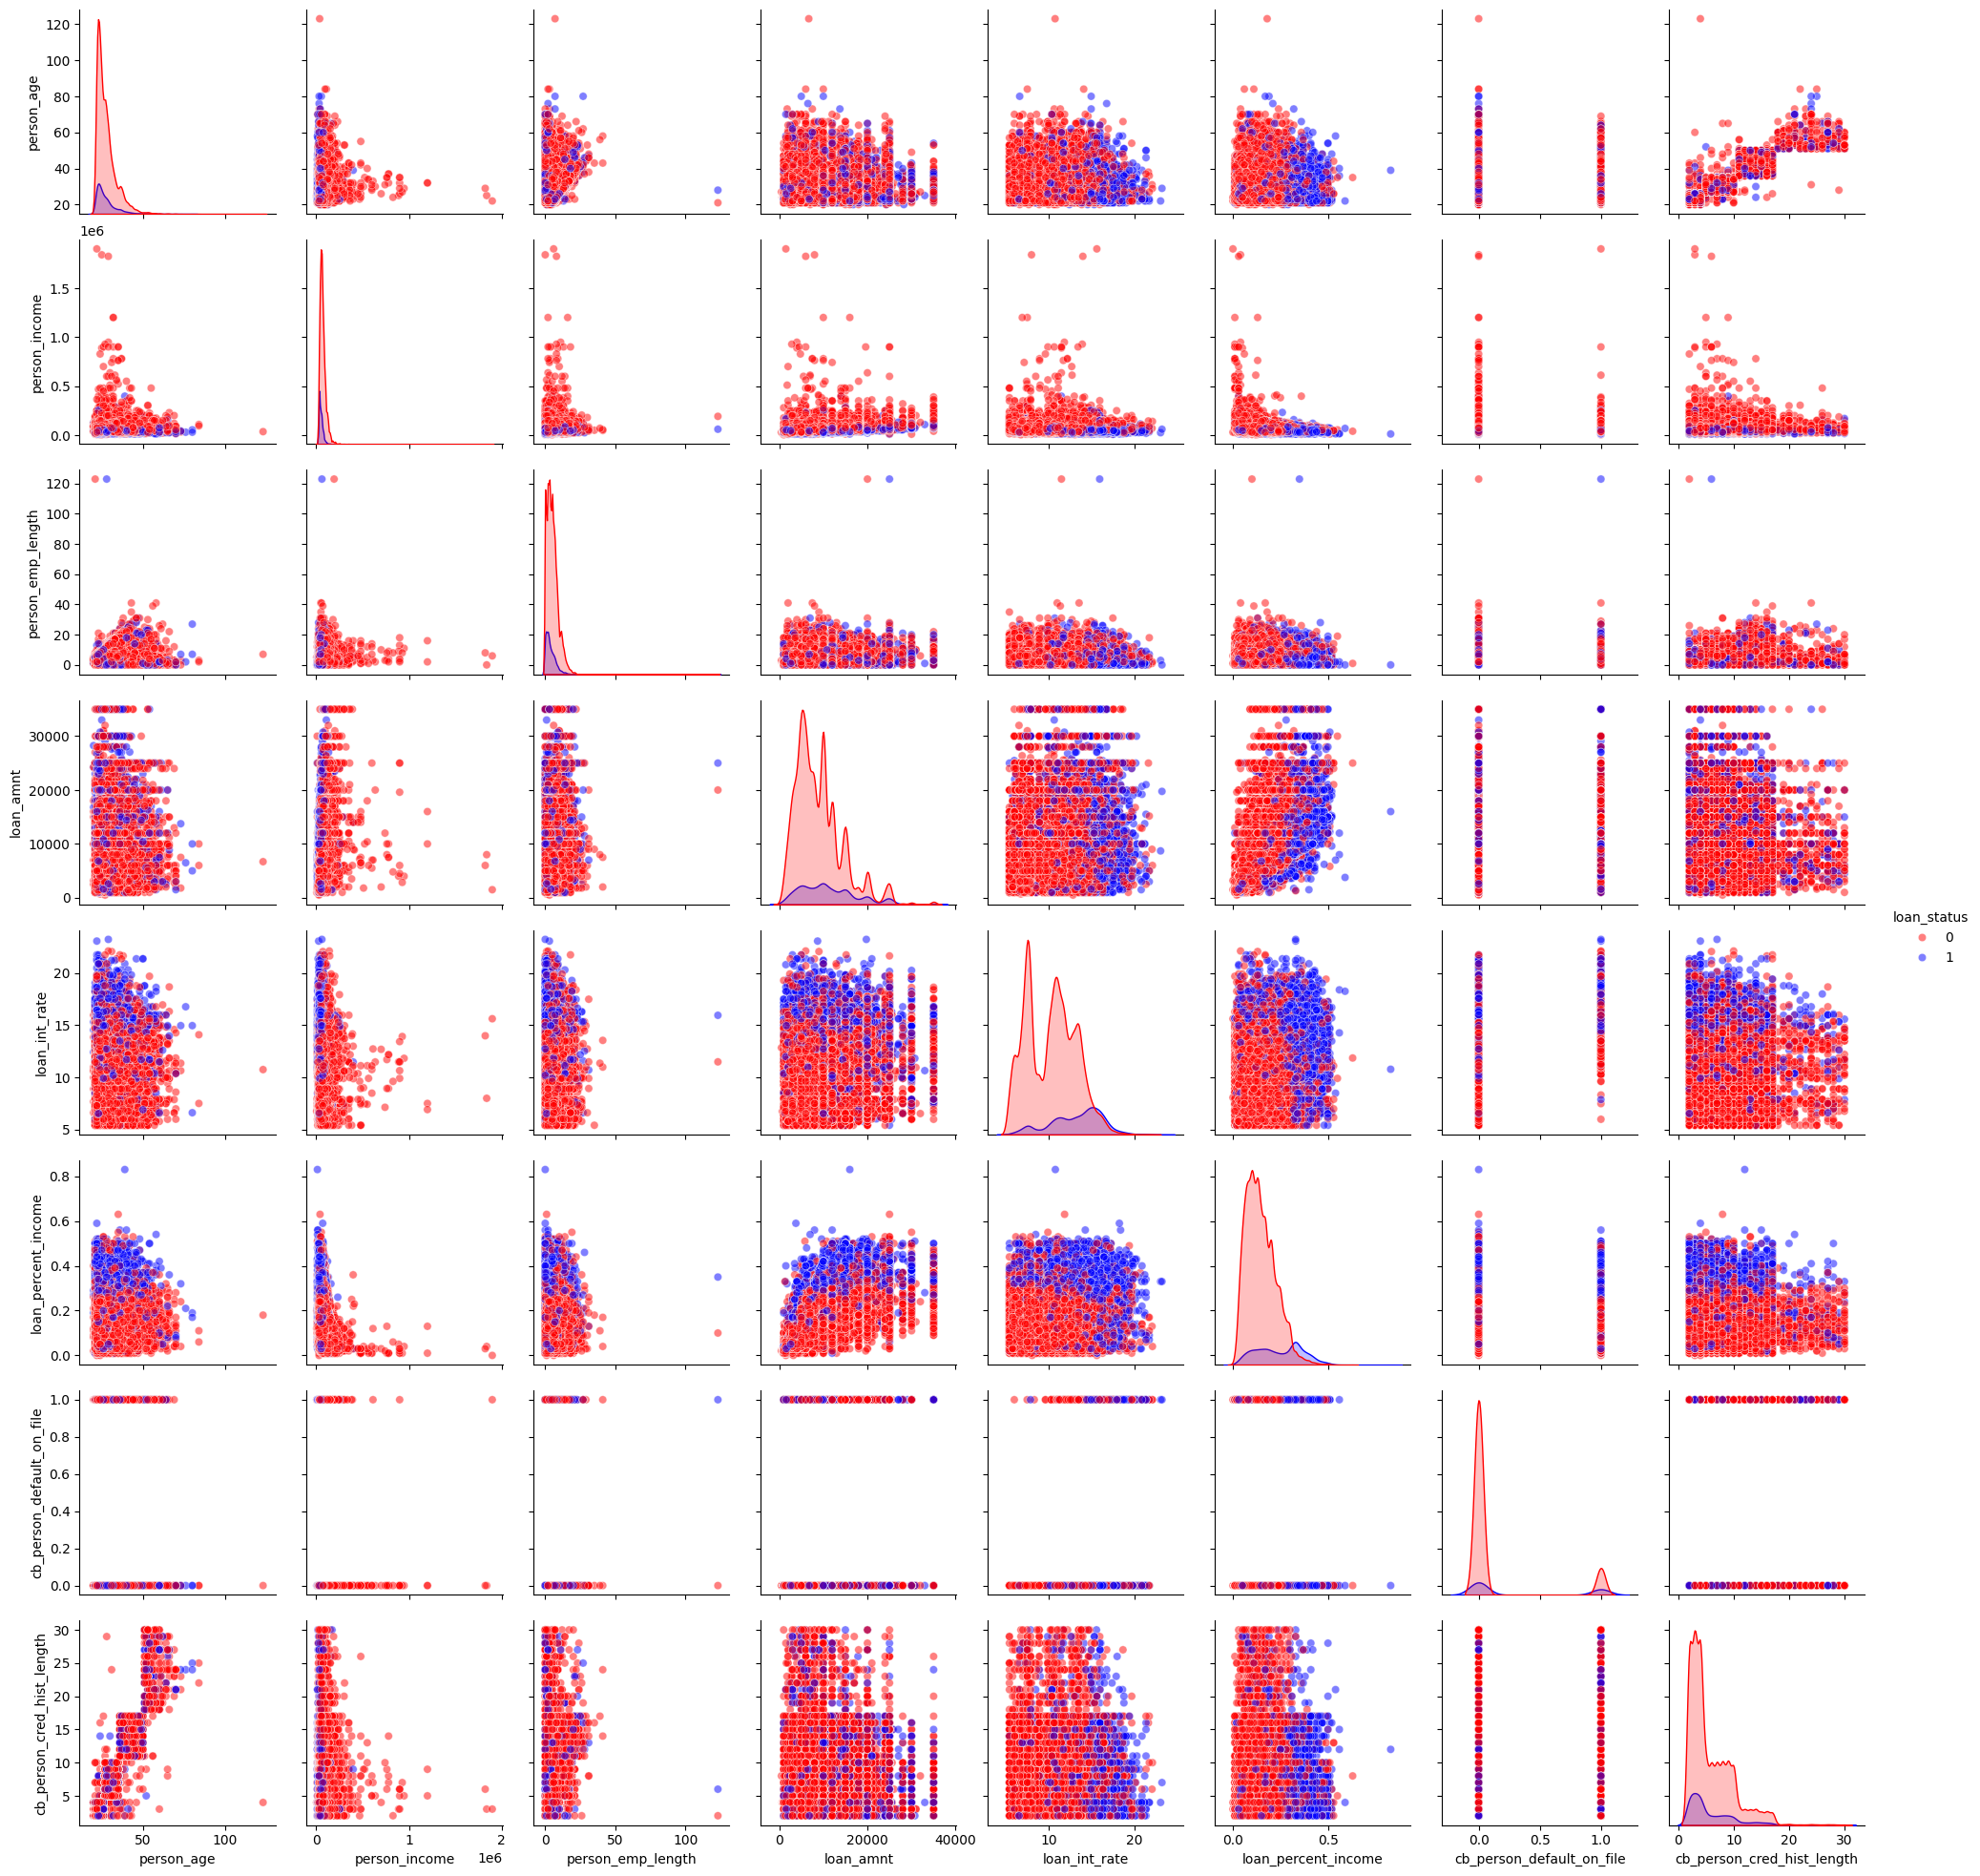

In [67]:
columns = explore_df.columns.to_list()
columns.remove("id")

# Create a pairplot with hue='loan_status' and custom palette
sns.pairplot(explore_df[columns], 
             hue='loan_status',
             plot_kws={'alpha': 0.5},
             palette={0: "red", 1: "blue"})  # Adjust the palette with different colors for different loan_status values

# Show the plot
plt.show()

In [68]:
function_list = [add_age_group, add_emp_length_group, classify_loan_grade, add_int_rate_group, classify_loan_percent_income, add_credit_hist_length_group]

for func in function_list :
    explore_df = func(explore_df)

dummy_list = ["age_group", "person_home_ownership", "emp_length_group", "loan_intent", "loan_grade", "loan_grade_class", "int_rate_group", "loan_percent_income_group", "credit_hist_length_group"]

for dummy in dummy_list :
    dummies = pd.get_dummies(explore_df[dummy], prefix= dummy, drop_first= False)

    explore_df = pd.concat([explore_df, dummies], axis= 1)

explore_df_clean = explore_df.copy()

drop_list = ["person_age", "age_group", "person_home_ownership", "emp_length_group", "loan_intent", "loan_grade", "loan_grade_class", "int_rate_group", "loan_percent_income_group", "credit_hist_length_group"]

for drop in drop_list :
    explore_df_clean.drop(drop, axis= 1, inplace= True)


column_to_move = 'loan_status'
columns = [col for col in explore_df_clean.columns if col != column_to_move] + [column_to_move] 

explore_df_clean = explore_df_clean[columns]

explore_df_clean.head()

id  person_income  person_emp_length  loan_amnt  loan_int_rate  \
0   0          35000                0.0       6000          11.49   
1   1          56000                6.0       4000          13.35   
2   2          28800                8.0       6000           8.90   
3   3          70000               14.0      12000          11.11   
4   4          60000                2.0       6000           6.92   

   loan_percent_income  cb_person_default_on_file  cb_person_cred_hist_length  \
0                 0.17                      False                          14   
1                 0.07                      False                           2   
2                 0.21                      False                          10   
3                 0.17                      False                           5   
4                 0.10                      False                           3   

   age_group_<25  age_group_25-34  ...  loan_percent_income_group_Moderate  \
0          False            False  ...                               False   
1           True            False  ...                               False   
2          False             True  ...                               False   
3          False             True  ...                               False   
4           True            False  ...                               False   

   loan_percent_income_group_High  loan_percent_income_group_Very High  \
0                           False                                False   
1                           False                                False   
2                           False                                False   
3                           False                                False   
4                           False                                False   

   loan_percent_income_group_Extremely High  \
0                                     False   
1                                     False   
2                                     False   
3                                     False   
4                                     False   

   credit_hist_length_group_Very Short  credit_hist_length_group_Short  \
0                                False                           False   
1                                 True                           False   
2                                False                            True   
3                                 True                           False   
4                                 True                           False   

   credit_hist_length_group_Medium  credit_hist_length_group_Long  \
0                             True                          False   
1                            False                          False   
2                            False                          False   
3                            False                          False   
4                            False                          False   

   credit_hist_length_group_Very Long  loan_status  
0                               False            0  
1                               False            0  
2                               False            0  
3                               False            0  
4                               False            0  

[5 rows x 56 columns]

In [69]:
explore_df_clean.columns

Index(['id', 'person_income', 'person_emp_length', 'loan_amnt',
       'loan_int_rate', 'loan_percent_income', 'cb_person_default_on_file',
       'cb_person_cred_hist_length', 'age_group_<25', 'age_group_25-34',
       'age_group_35-44', 'age_group_45-54', 'age_group_55-64',
       'age_group_65+', 'person_home_ownership_MORTGAGE',
       'person_home_ownership_OTHER', 'person_home_ownership_OWN',
       'person_home_ownership_RENT', 'emp_length_group_0',
       'emp_length_group_<1', 'emp_length_group_1-3', 'emp_length_group_3-5',
       'emp_length_group_5-10', 'emp_length_group_10-20',
       'emp_length_group_20+', 'loan_intent_DEBTCONSOLIDATION',
       'loan_intent_EDUCATION', 'loan_intent_HOMEIMPROVEMENT',
       'loan_intent_MEDICAL', 'loan_intent_PERSONAL', 'loan_intent_VENTURE',
       'loan_grade_A', 'loan_grade_B', 'loan_grade_C', 'loan_grade_D',
       'loan_grade_E', 'loan_grade_F', 'loan_grade_G', 'loan_grade_class_Bad',
       'loan_grade_class_Good', 'int_rate_group_L

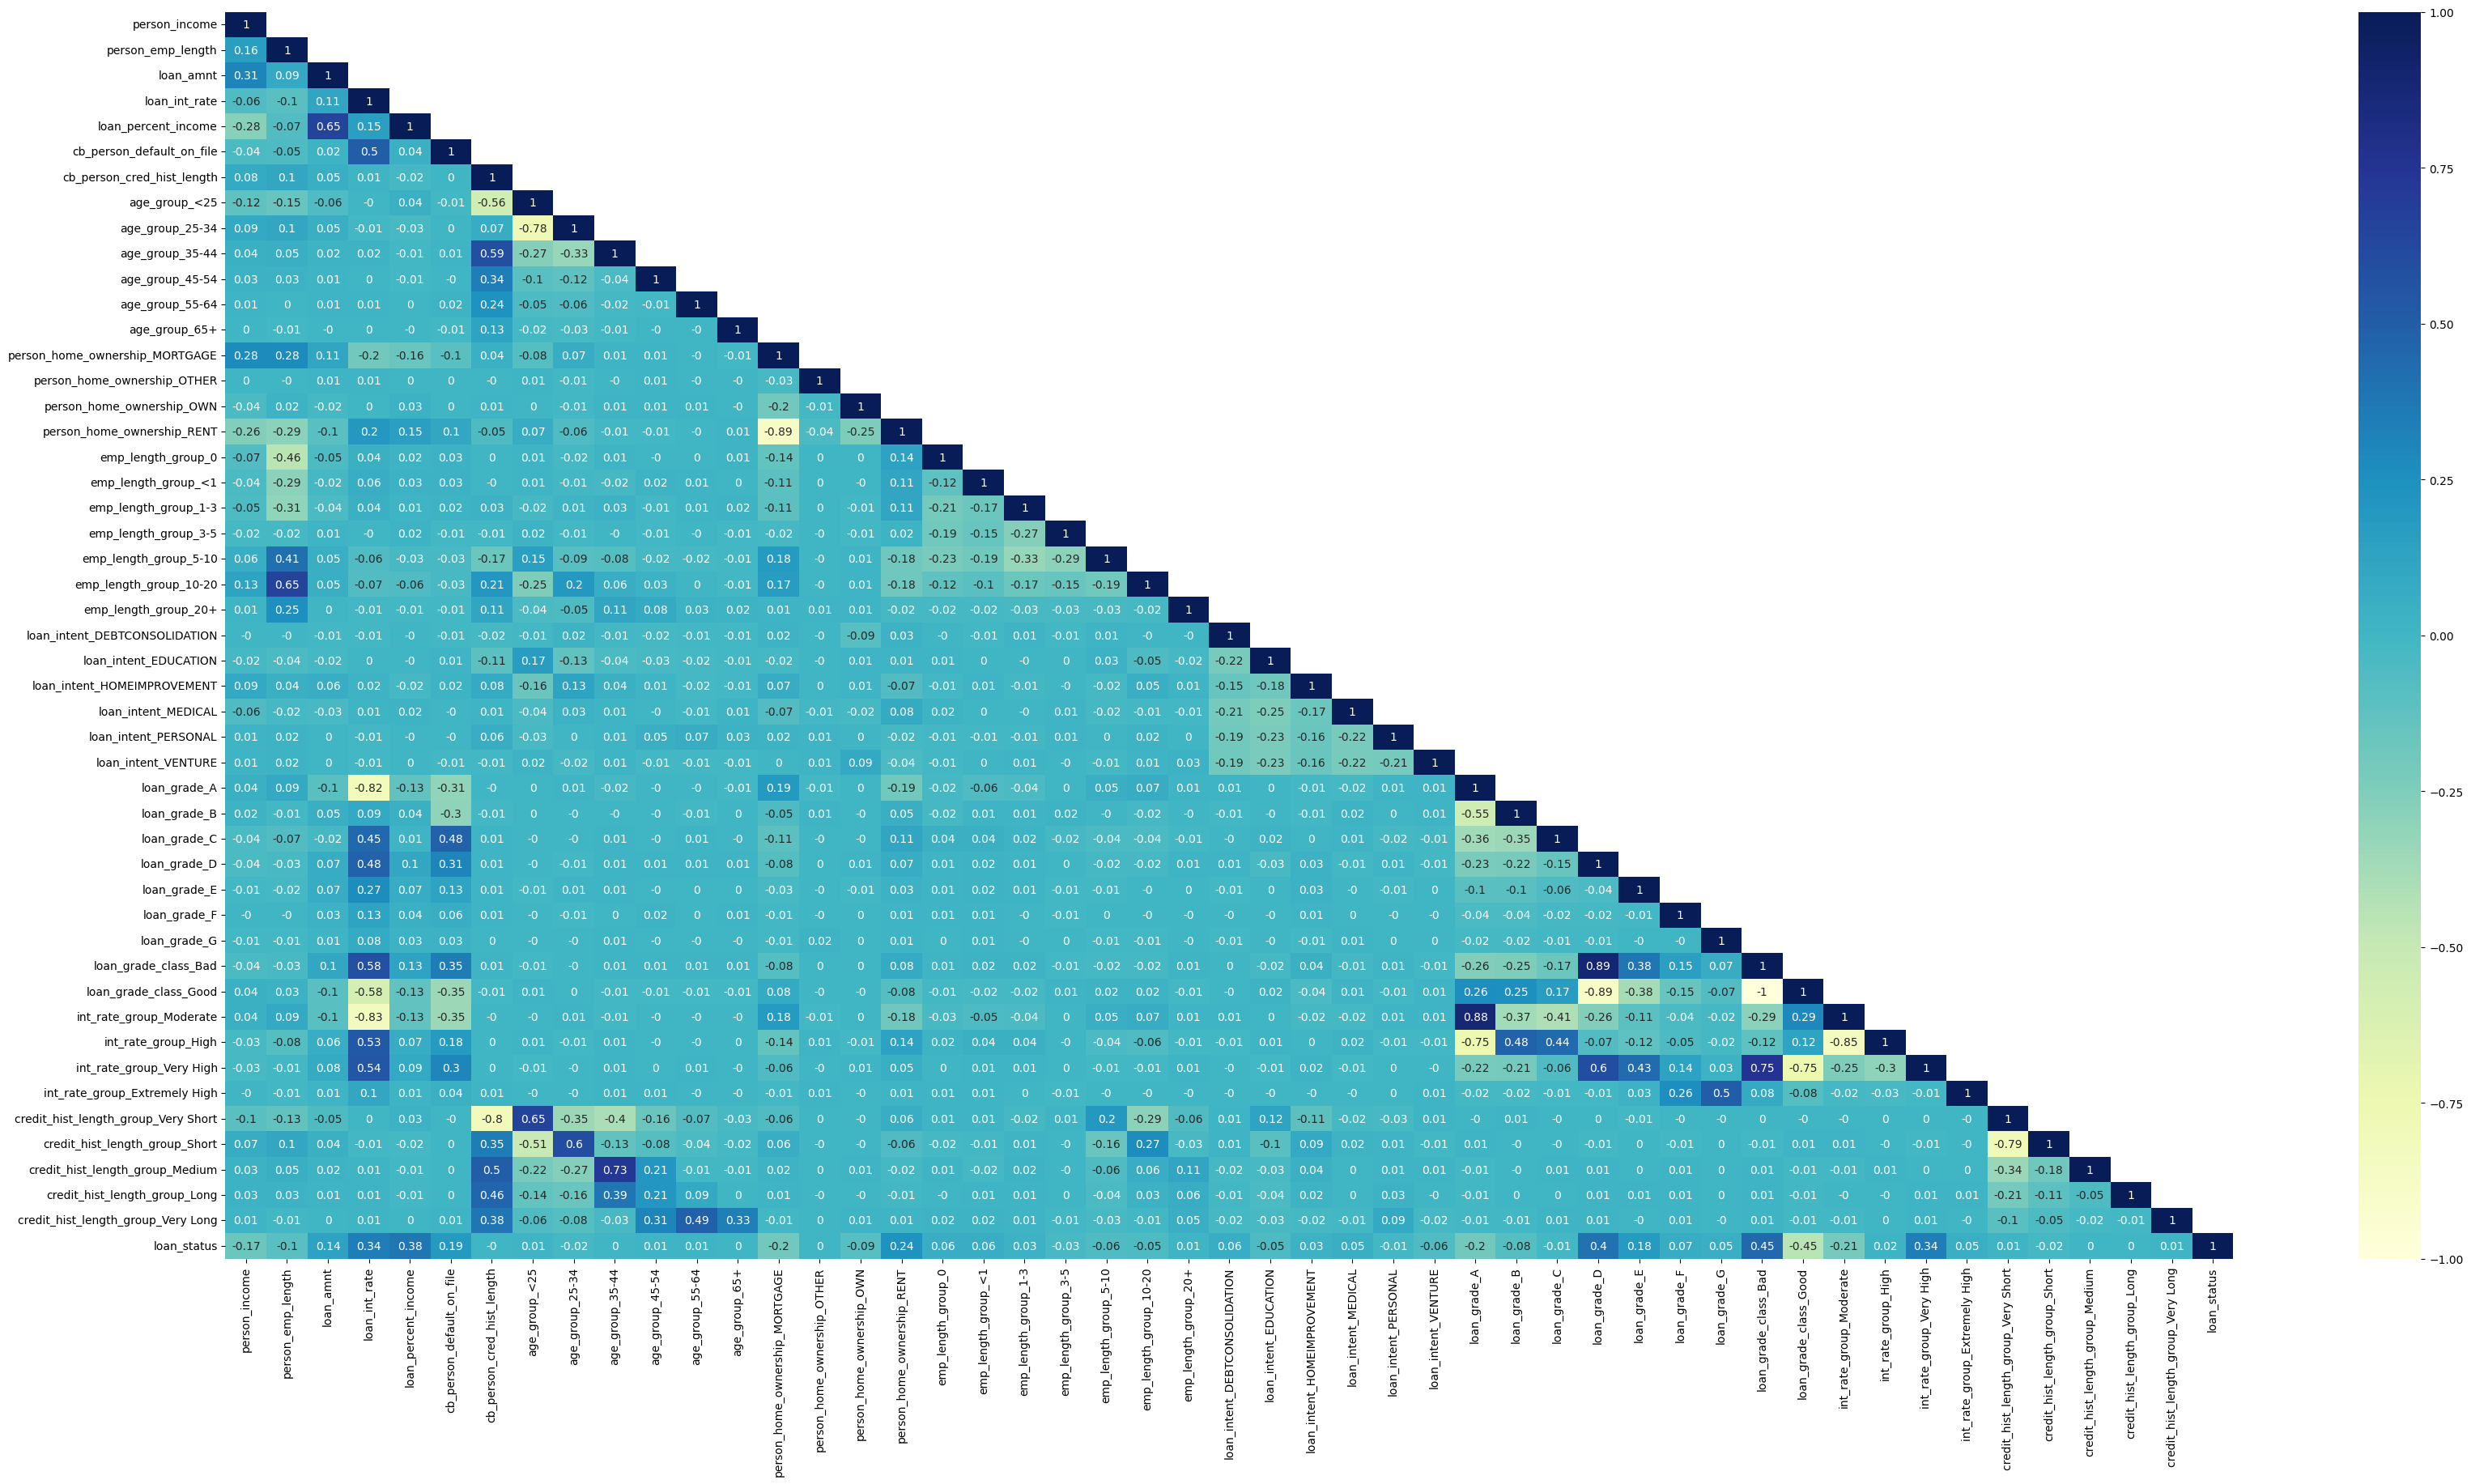

In [70]:
columns = explore_df_clean.columns.to_list()
columns.remove("id")

corr = explore_df_clean[columns].corr().round(2)

corr.drop(["int_rate_group_Low", "loan_percent_income_group_Low", "loan_percent_income_group_Moderate", "loan_percent_income_group_High", "loan_percent_income_group_Very High", "loan_percent_income_group_Extremely High"], axis = 0, inplace= True)
corr.drop(["int_rate_group_Low", "loan_percent_income_group_Low", "loan_percent_income_group_Moderate", "loan_percent_income_group_High", "loan_percent_income_group_Very High", "loan_percent_income_group_Extremely High"], axis = 1, inplace= True)

mask = np.triu(np.ones_like(corr, dtype= bool), k= 1)

plt.figure(figsize=(40,20))
sns.heatmap(corr, annot= True, cmap="YlGnBu", mask= mask)
plt.show()

In [71]:
# Step 1: Unstack the correlation matrix to get pairwise correlations
corr_unstacked = corr.abs().unstack()  # unstacking and taking absolute values for sorting

# Step 2: Remove duplicate pairs (since the matrix is symmetrical)
corr_unstacked = corr_unstacked.sort_values(ascending=False).drop_duplicates()

# Step 3: Filter out self-correlations (correlation of a variable with itself)
corr_unstacked = corr_unstacked[corr_unstacked.index.get_level_values(0) != corr_unstacked.index.get_level_values(1)]

# Step 4: Get the top n highest correlations
top_n_corr = corr_unstacked.head(30)

# Print the top 5 highest correlations
top_n_corr


person_home_ownership_MORTGAGE       person_home_ownership_RENT             0.89
loan_grade_A                         int_rate_group_Moderate                0.88
int_rate_group_Moderate              int_rate_group_High                    0.85
loan_int_rate                        int_rate_group_Moderate                0.83
loan_grade_A                         loan_int_rate                          0.82
cb_person_cred_hist_length           credit_hist_length_group_Very Short    0.80
credit_hist_length_group_Very Short  credit_hist_length_group_Short         0.79
age_group_<25                        age_group_25-34                        0.78
loan_grade_A                         int_rate_group_High                    0.75
credit_hist_length_group_Medium      age_group_35-44                        0.73
credit_hist_length_group_Very Short  age_group_<25                          0.65
loan_grade_D                         int_rate_group_Very High               0.60
age_group_35-44             

## The Number of Default Loan (1) in each Loan Intent

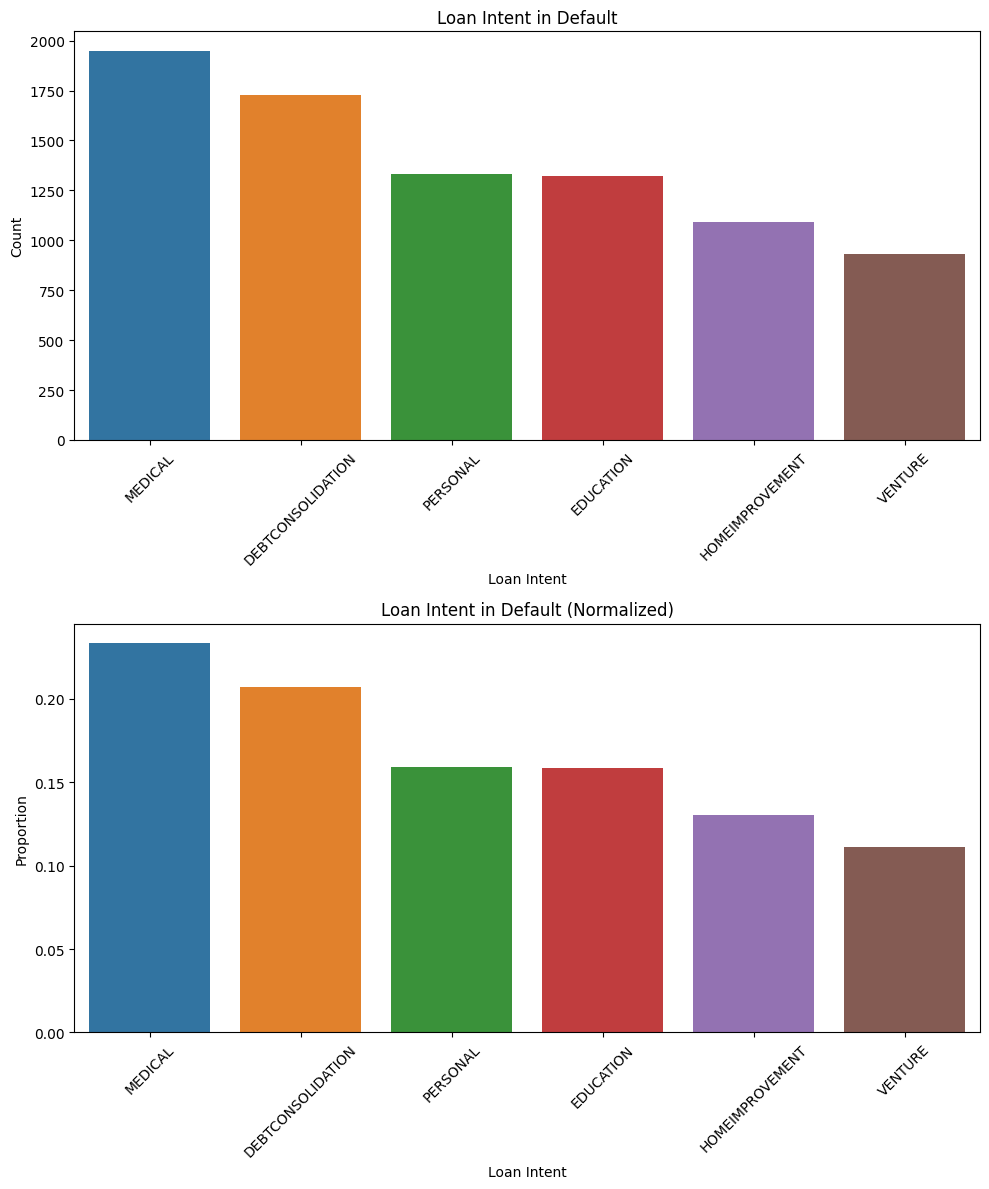

loan_intent  count  propotion
0            MEDICAL   1949      23.34
1  DEBTCONSOLIDATION   1729      20.71
2           PERSONAL   1330      15.93
3          EDUCATION   1322      15.83
4    HOMEIMPROVEMENT   1091      13.07
5            VENTURE    929      11.13

In [72]:
df = pd.read_csv("train.csv")

# Group the data for the first bar chart (loan_status == 1 - Default)
category_counts_default = df[df["loan_status"] == 1]["loan_intent"].value_counts().reset_index()
category_counts_default.columns = ['loan_intent', 'count']

# Group the data for the second bar chart (loan_status == 1 - Default)
category_counts_default_normalize = df[df["loan_status"] == 1]["loan_intent"].value_counts(normalize=True).reset_index()
category_counts_default_normalize.columns = ['loan_intent', 'proportion']

# Create a figure with two subplots (stacked vertically)
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 12))

# First plot: Loan Intent in Default
sns.barplot(x='loan_intent', y='count', data=category_counts_default, ax=axes[0], hue='loan_intent')
axes[0].set_title('Loan Intent in Default')
axes[0].set_ylabel('Count')
axes[0].set_xlabel('Loan Intent')
axes[0].tick_params(axis='x', rotation=45)


# Second plot: Loan Intent in Default (Normalized)
sns.barplot(x='loan_intent', y='proportion', data=category_counts_default_normalize, ax=axes[1], hue='loan_intent')
axes[1].set_title('Loan Intent in Default (Normalized)')
axes[1].set_ylabel('Proportion')
axes[1].set_xlabel('Loan Intent')
axes[1].tick_params(axis='x', rotation=45)


# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

number_of_loan_intent_in_default_group = pd.DataFrame(category_counts_default)

number_of_loan_intent_in_default_group["propotion"] = np.round(category_counts_default_normalize["proportion"] * 100, 2)

number_of_loan_intent_in_default_group

## The Number of Not Default Loan (0) in each Loan Intent

In [73]:
# Group the data for the first bar chart (loan_status == 0 - Not Default)
category_counts_not_default = df[df["loan_status"] == 0]["loan_intent"].value_counts().reset_index()
category_counts_not_default.columns = ['loan_intent', 'count']

# Group the data for the second bar chart (loan_status == 0 - Not Default)
category_counts_not_default_normalize = df[df["loan_status"] == 0]["loan_intent"].value_counts(normalize=True).reset_index()
category_counts_not_default_normalize.columns = ['loan_intent', 'proportion']

# Create a figure with two subplots (stacked vertically)
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 12))

# First plot: Loan Intent in Not Default
sns.barplot(x='loan_intent', y='count', data=category_counts_not_default, ax=axes[0], hue='loan_intent')
axes[0].set_title('Loan Intent in Not Default')
axes[0].set_ylabel('Count')
axes[0].set_xlabel('Loan Intent')
axes[0].tick_params(axis='x', rotation=45)


# Second plot: Loan Intent in Not Default (Normalized)
sns.barplot(x='loan_intent', y='proportion', data=category_counts_not_default_normalize, ax=axes[1], hue='loan_intent')
axes[1].set_title('Loan Intent in Not Default (Normalized)')
axes[1].set_ylabel('Proportion')
axes[1].set_xlabel('Loan Intent')
axes[1].tick_params(axis='x', rotation=45)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

number_of_loan_intent_in_not_default_group = pd.DataFrame(category_counts_not_default)

number_of_loan_intent_in_not_default_group["propotion"] = np.round(category_counts_not_default_normalize["proportion"] * 100, 2)

number_of_loan_intent_in_not_default_group

loan_intent  count  propotion
0          EDUCATION  10949      21.77
1            VENTURE   9082      18.06
2            MEDICAL   8985      17.86
3           PERSONAL   8686      17.27
4  DEBTCONSOLIDATION   7404      14.72
5    HOMEIMPROVEMENT   5189      10.32

## Proportion between Default Loan and Not Default Loan in each Loan Intent

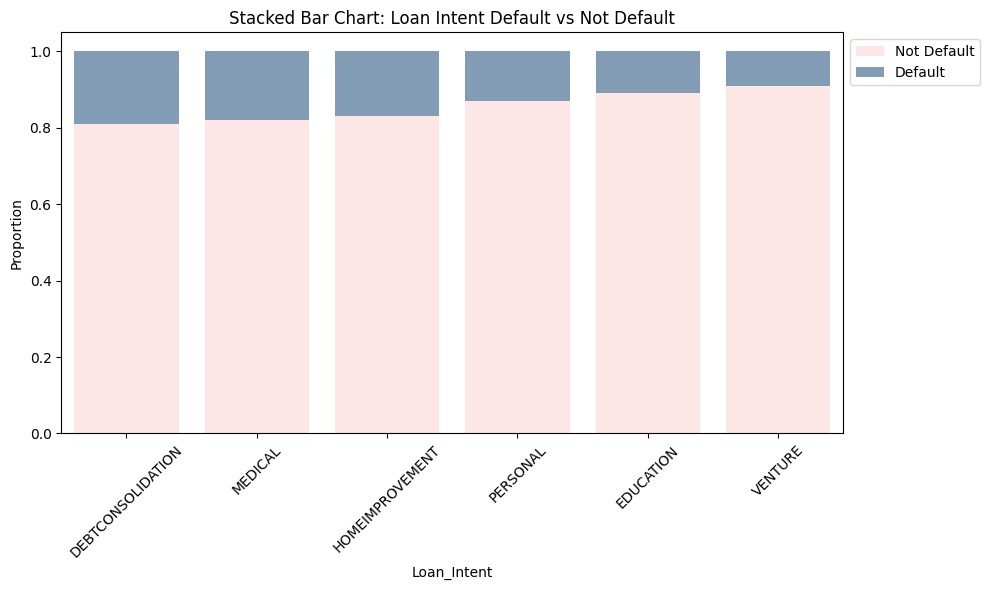

Loan_Intent  Not_Default_Proportion  Default_Proportion  Total Counts
4  DEBTCONSOLIDATION                    0.81                0.19          9133
1            MEDICAL                    0.82                0.18         10934
5    HOMEIMPROVEMENT                    0.83                0.17          6280
2           PERSONAL                    0.87                0.13         10016
0          EDUCATION                    0.89                0.11         12271
3            VENTURE                    0.91                0.09         10011

In [74]:
# Calculate Default and Not Default proportion for each loan intent
proportion_list = []

# Get unique loan intent
loan_intent_list = df["loan_intent"].unique()

for loan_type in loan_intent_list :
    # Condition
    not_default_condition = (df["loan_intent"] == loan_type) & (df["loan_status"] == 0)
    default_condition = (df["loan_intent"] == loan_type) & (df["loan_status"] == 1)
    
    # Count default and not default for the given loan intent
    default_count = df[default_condition].shape[0]
    not_default_count = df[not_default_condition].shape[0]
    total = default_count + not_default_count

    if total > 0 :
        default_proportion = round((default_count / total), 2)
        not_default_proportion = round((not_default_count / total), 2)
    else :
        default_proportion = 0
        not_default_proportion = 0

    # Add proportion to the list
    proportion_list.append([loan_type, not_default_proportion, default_proportion, total])

# Create a DataFrame for plotting
proportion_loan_intent_df = pd.DataFrame(proportion_list, columns= ["Loan_Intent", "Not_Default_Proportion", "Default_Proportion", "Total Counts"])

# Sort the DataFrame
proportion_loan_intent_df = proportion_loan_intent_df.sort_values(by= "Default_Proportion", ascending= False)

# Create the figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the first set of bars (default counts)
sns.barplot(x='Loan_Intent', y='Not_Default_Proportion', data=proportion_loan_intent_df, color='#FFE3E3', label='Not Default', ax=ax)

# Plot the second set of bars (not default counts) on top of the first one, offset by the default counts
sns.barplot(x='Loan_Intent', y='Default_Proportion', data=proportion_loan_intent_df, color='#789DBC', label='Default', ax=ax,
            bottom=proportion_loan_intent_df['Not_Default_Proportion'])

# Add labels and legend
ax.set_ylabel('Proportion')
ax.set_title('Stacked Bar Chart: Loan Intent Default vs Not Default')
ax.legend()

# Move the legend to the upper right, outside of the plot
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))

# Rotate x-axis labels if necessary
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()

proportion_loan_intent_df

## The Number of Default Loan (1) in each Loan Grade

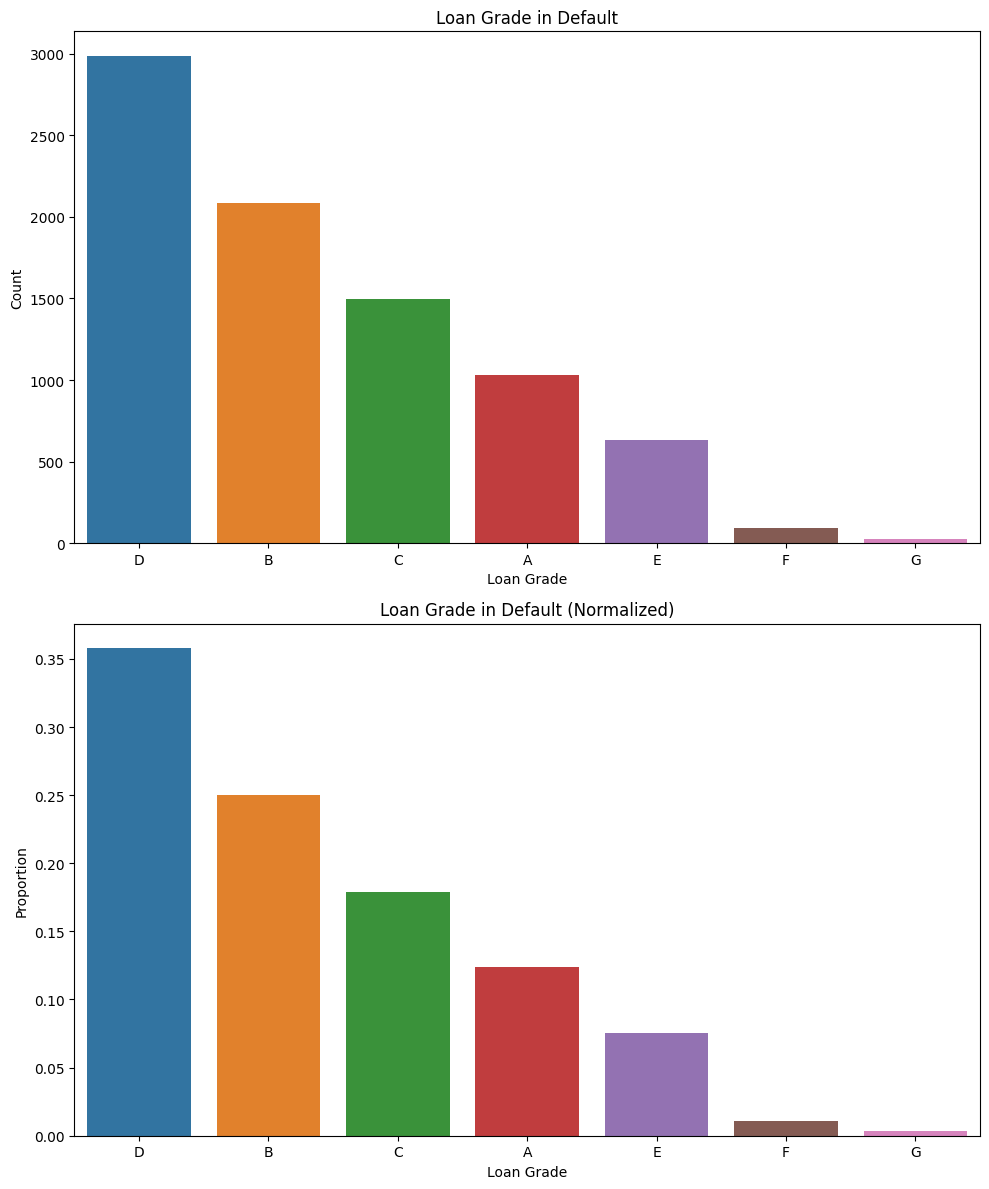

loan_grade  count  propotion
0          D   2988      35.78
1          B   2087      24.99
2          C   1494      17.89
3          A   1032      12.36
4          E    631       7.56
5          F     91       1.09
6          G     27       0.32

In [75]:
# Group the data for the first bar chart (loan_status == 1 - Default)
loan_grade_counts_default = df[df["loan_status"] == 1]["loan_grade"].value_counts().reset_index()
loan_grade_counts_default.columns = ['loan_grade', 'count']

# Group the data for the second bar chart (loan_status == 1 - Default)
loan_grade_counts_default_normalize = df[df["loan_status"] == 1]["loan_grade"].value_counts(normalize=True).reset_index()
loan_grade_counts_default_normalize.columns = ['loan_grade', 'proportion']

# Create a figure with two subplots (stacked vertically)
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 12))

# First plot: Loan Grade in Default
sns.barplot(x='loan_grade', y='count', data=loan_grade_counts_default, ax=axes[0], hue='loan_grade')
axes[0].set_title('Loan Grade in Default')
axes[0].set_ylabel('Count')
axes[0].set_xlabel('Loan Grade')

# Second plot: Loan Grade in Default (Normalized)
sns.barplot(x='loan_grade', y='proportion', data=loan_grade_counts_default_normalize, ax=axes[1], hue='loan_grade')
axes[1].set_title('Loan Grade in Default (Normalized)')
axes[1].set_ylabel('Proportion')
axes[1].set_xlabel('Loan Grade')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

number_of_loan_grade_in_default_group = pd.DataFrame(loan_grade_counts_default)

number_of_loan_grade_in_default_group["propotion"] = np.round(loan_grade_counts_default_normalize["proportion"] * 100, 2)

number_of_loan_grade_in_default_group

## The Number of Not Default Loan (0) in each Loan Grade

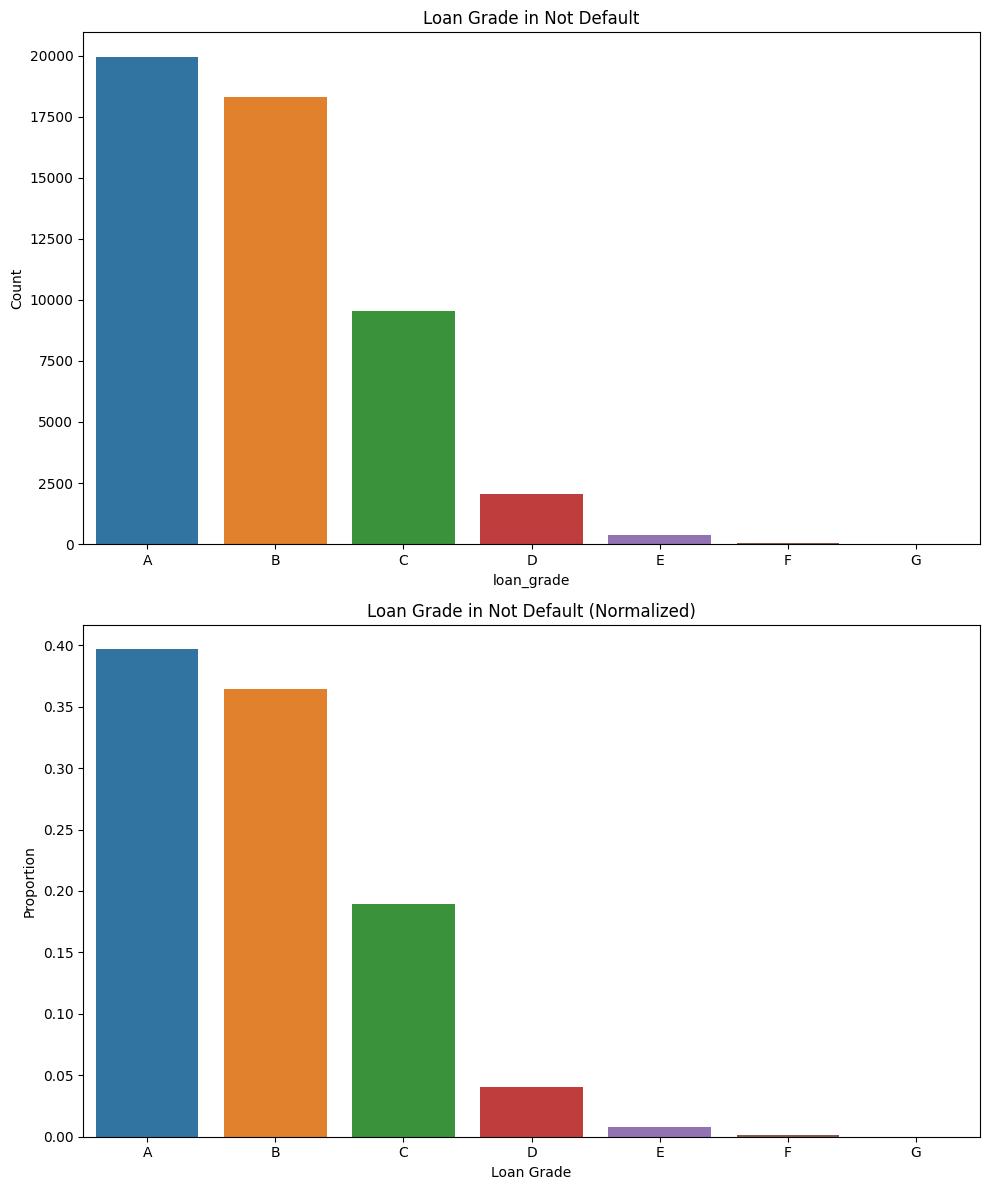

loan_grade  count  propotion
0          A  19952      39.67
1          B  18313      36.41
2          C   9542      18.97
3          D   2046       4.07
4          E    378       0.75
5          F     58       0.12
6          G      6       0.01

In [76]:
# Group the data for the first bar chart (loan_status == 1 - Not Default)
loan_grade_counts_not_default = df[df["loan_status"] == 0]["loan_grade"].value_counts().reset_index()
loan_grade_counts_not_default.columns = ['loan_grade', 'count']

# Group the data for the second bar chart (loan_status == 1 - Not Default)
loan_grade_counts_not_default_normalize = df[df["loan_status"] == 0]["loan_grade"].value_counts(normalize=True).reset_index()
loan_grade_counts_not_default_normalize.columns = ['loan_grade', 'proportion']

# Create a figure with two subplots (stacked vertically)
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 12))

# First plot: Loan Grade Not in Default
sns.barplot(x='loan_grade', y='count', data=loan_grade_counts_not_default, ax=axes[0], hue='loan_grade')
axes[0].set_title('Loan Grade in Not Default')
axes[0].set_ylabel('Count')
axes[0].set_xlabel('loan_grade')

# Second plot: Loan Grade Not in Default (Normalized)
sns.barplot(x='loan_grade', y='proportion', data=loan_grade_counts_not_default_normalize, ax=axes[1], hue='loan_grade')
axes[1].set_title('Loan Grade in Not Default (Normalized)')
axes[1].set_ylabel('Proportion')
axes[1].set_xlabel('Loan Grade')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

number_of_loan_grade_in_not_default_group = pd.DataFrame(loan_grade_counts_not_default)

number_of_loan_grade_in_not_default_group["propotion"] = np.round(loan_grade_counts_not_default_normalize["proportion"] * 100, 2)

number_of_loan_grade_in_not_default_group

## Proportion between Default Loan (1) and Not Default Loan (0) in each Loan Grade

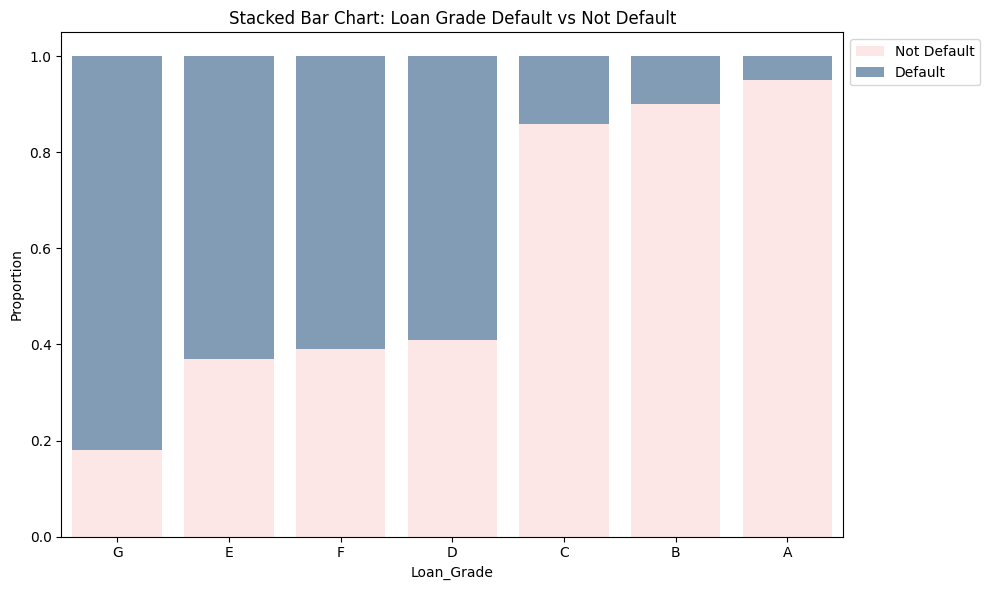

Loan_Grade  Not_Default_Proportion  Default_Proportion  Total Count
6          G                    0.18                0.82           33
4          E                    0.37                0.63         1009
5          F                    0.39                0.61          149
3          D                    0.41                0.59         5034
1          C                    0.86                0.14        11036
0          B                    0.90                0.10        20400
2          A                    0.95                0.05        20984

In [77]:
# Calculate Default and Not Default proportion for each loan intent
proportion_list = []

# Get unique loan intent
loan_grade_list = df["loan_grade"].unique()

for loan_grade in loan_grade_list :
    # Condition
    not_default_condition = (df["loan_grade"] == loan_grade) & (df["loan_status"] == 0)
    default_condition = (df["loan_grade"] == loan_grade) & (df["loan_status"] == 1)
    
    # Count default and not default for the given loan grade
    default_count = df[default_condition].shape[0]
    not_default_count = df[not_default_condition].shape[0]
    total = default_count + not_default_count

    if total > 0 :
        default_proportion = round((default_count / total), 2)
        not_default_proportion = round((not_default_count / total), 2)
    else :
        default_proportion = 0
        not_default_proportion = 0

    # Add proportion to the list
    proportion_list.append([loan_grade, not_default_proportion, default_proportion, total])

# Create a DataFrame for plotting
proportion_loan_grade_df = pd.DataFrame(proportion_list, columns= ["Loan_Grade", "Not_Default_Proportion", "Default_Proportion", "Total Count"])

# Sort the DataFrame
proportion_loan_grade_df = proportion_loan_grade_df.sort_values(by= "Default_Proportion", ascending= False)

# Create the figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the first set of bars (default counts)
sns.barplot(x='Loan_Grade', y='Not_Default_Proportion', data=proportion_loan_grade_df, color='#FFE3E3', label='Not Default', ax=ax)

# Plot the second set of bars (not default counts) on top of the first one, offset by the default counts
sns.barplot(x='Loan_Grade', y='Default_Proportion', data=proportion_loan_grade_df, color='#789DBC', label='Default', ax=ax,
            bottom=proportion_loan_grade_df['Not_Default_Proportion'])

# Add labels and legend
ax.set_ylabel('Proportion')
ax.set_title('Stacked Bar Chart: Loan Grade Default vs Not Default')
ax.legend()

# Move the legend to the upper right, outside of the plot
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))

# Show the plot
plt.tight_layout()
plt.show()

proportion_loan_grade_df

## Number of Default Loan (1) in each Person Home Ownership Status

In [78]:
# Group the data for the first bar chart (loan_status == 1 - Default)
person_home_ownership_counts_default = df[df["loan_status"] == 1]["person_home_ownership"].value_counts().reset_index()
person_home_ownership_counts_default.columns = ['person_home_ownership', 'count']

# Group the data for the second bar chart (loan_status == 1 - Default)
person_home_ownership_counts_default_normalize = df[df["loan_status"] == 1]["person_home_ownership"].value_counts(normalize=True).reset_index()
person_home_ownership_counts_default_normalize.columns = ['person_home_ownership', 'proportion']

# Create a figure with two subplots (stacked vertically)
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 12))

# First plot: Loan Grade in Default
sns.barplot(x='person_home_ownership', y='count', data=person_home_ownership_counts_default, ax=axes[0], hue='person_home_ownership')
axes[0].set_title('person_home_ownership in Default')
axes[0].set_ylabel('Count')
axes[0].set_xlabel('person_home_ownership')

# Second plot: Loan Grade in Default (Normalized)
sns.barplot(x='person_home_ownership', y='proportion', data=person_home_ownership_counts_default_normalize, ax=axes[1], hue='person_home_ownership')
axes[1].set_title('person_home_ownership in Default (Normalized)')
axes[1].set_ylabel('Proportion')
axes[1].set_xlabel('person_home_ownership')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

number_of_person_home_ownership_in_default_group = pd.DataFrame(person_home_ownership_counts_default)

number_of_person_home_ownership_in_default_group["propotion"] = np.round(person_home_ownership_counts_default_normalize["proportion"] * 100, 2)

number_of_person_home_ownership_in_default_group

person_home_ownership  count  propotion
0                  RENT   6809      81.54
1              MORTGAGE   1483      17.76
2                   OWN     43       0.51
3                 OTHER     15       0.18

## Number of Not Default Loan (0) in each Person Home Ownership Status

In [79]:
# Group the data for the first bar chart (loan_status == 1 - Default)
person_home_ownership_counts_not_default = df[df["loan_status"] == 0]["person_home_ownership"].value_counts().reset_index()
person_home_ownership_counts_not_default.columns = ['person_home_ownership', 'count']

# Group the data for the second bar chart (loan_status == 1 - Default)
person_home_ownership_counts_not_default_normalize = df[df["loan_status"] == 0]["person_home_ownership"].value_counts(normalize=True).reset_index()
person_home_ownership_counts_not_default_normalize.columns = ['person_home_ownership', 'proportion']

# Create a figure with two subplots (stacked vertically)
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 12))

# First plot: Loan Grade in Default
sns.barplot(x='person_home_ownership', y='count', data=person_home_ownership_counts_not_default, ax=axes[0], hue='person_home_ownership')
axes[0].set_title('person_home_ownership in Not Default')
axes[0].set_ylabel('Count')
axes[0].set_xlabel('person_home_ownership')

# Second plot: Loan Grade in Default (Normalized)
sns.barplot(x='person_home_ownership', y='proportion', data=person_home_ownership_counts_not_default_normalize, ax=axes[1], hue='person_home_ownership')
axes[1].set_title('person_home_ownership in Not Default (Normalized)')
axes[1].set_ylabel('Proportion')
axes[1].set_xlabel('person_home_ownership')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

number_of_person_home_ownership_in_not_default_group = pd.DataFrame(person_home_ownership_counts_not_default)

number_of_person_home_ownership_in_not_default_group["propotion"] = np.round(person_home_ownership_counts_not_default_normalize["proportion"] * 100, 2)

number_of_person_home_ownership_in_not_default_group

person_home_ownership  count  propotion
0                  RENT  23785      47.29
1              MORTGAGE  23341      46.41
2                   OWN   3095       6.15
3                 OTHER     74       0.15

## Proportion between Default Loan (1) and Not Default Loan (0) in each Person Home Ownership Status

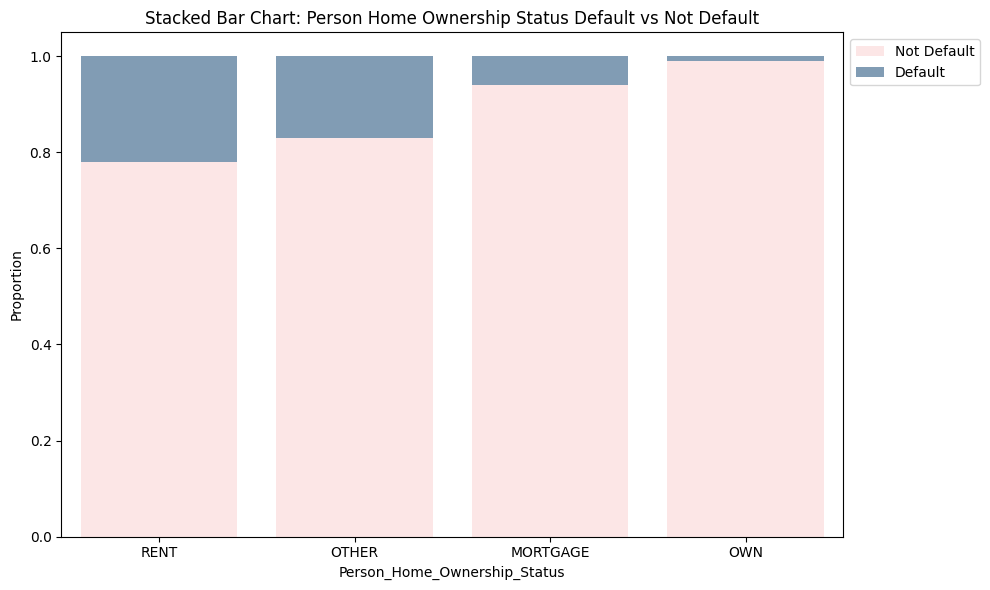

Person_Home_Ownership_Status  Not_Default_Proportion  Default_Proportion  \
0                         RENT                    0.78                0.22   
3                        OTHER                    0.83                0.17   
2                     MORTGAGE                    0.94                0.06   
1                          OWN                    0.99                0.01   

   Total Count  
0        30594  
3           89  
2        24824  
1         3138

In [80]:
# Calculate Default and Not Default proportion for each loan intent
proportion_list = []

# Get unique loan intent
person_home_ownership_list = df["person_home_ownership"].unique()

for status in person_home_ownership_list :
    # Condition
    not_default_condition = (df["person_home_ownership"] == status) & (df["loan_status"] == 0)
    default_condition = (df["person_home_ownership"] == status) & (df["loan_status"] == 1)
    
    # Count default and not default for the given loan grade
    default_count = df[default_condition].shape[0]
    not_default_count = df[not_default_condition].shape[0]
    total = default_count + not_default_count

    if total > 0 :
        default_proportion = round((default_count / total), 2)
        not_default_proportion = round((not_default_count / total), 2)
    else :
        default_proportion = 0
        not_default_proportion = 0

    # Add proportion to the list
    proportion_list.append([status, not_default_proportion, default_proportion, total])

# Create a DataFrame for plotting
proportion_person_home_ownership_df = pd.DataFrame(proportion_list, columns= ["Person_Home_Ownership_Status", "Not_Default_Proportion", "Default_Proportion", "Total Count"])

# Sort the DataFrame
proportion_person_home_ownership_df = proportion_person_home_ownership_df.sort_values(by= "Default_Proportion", ascending= False)

# Create the figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the first set of bars (default counts)
sns.barplot(x='Person_Home_Ownership_Status', y='Not_Default_Proportion', data=proportion_person_home_ownership_df, color='#FFE3E3', label='Not Default', ax=ax)

# Plot the second set of bars (not default counts) on top of the first one, offset by the default counts
sns.barplot(x='Person_Home_Ownership_Status', y='Default_Proportion', data=proportion_person_home_ownership_df, color='#789DBC', label='Default', ax=ax,
            bottom=proportion_person_home_ownership_df['Not_Default_Proportion'])

# Add labels and legend
ax.set_ylabel('Proportion')
ax.set_title('Stacked Bar Chart: Person Home Ownership Status Default vs Not Default')
ax.legend()

# Move the legend to the upper right, outside of the plot
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))

# Show the plot
plt.tight_layout()
plt.show()

proportion_person_home_ownership_df

## Number of Default Loan (1) in each Person Default On File Status

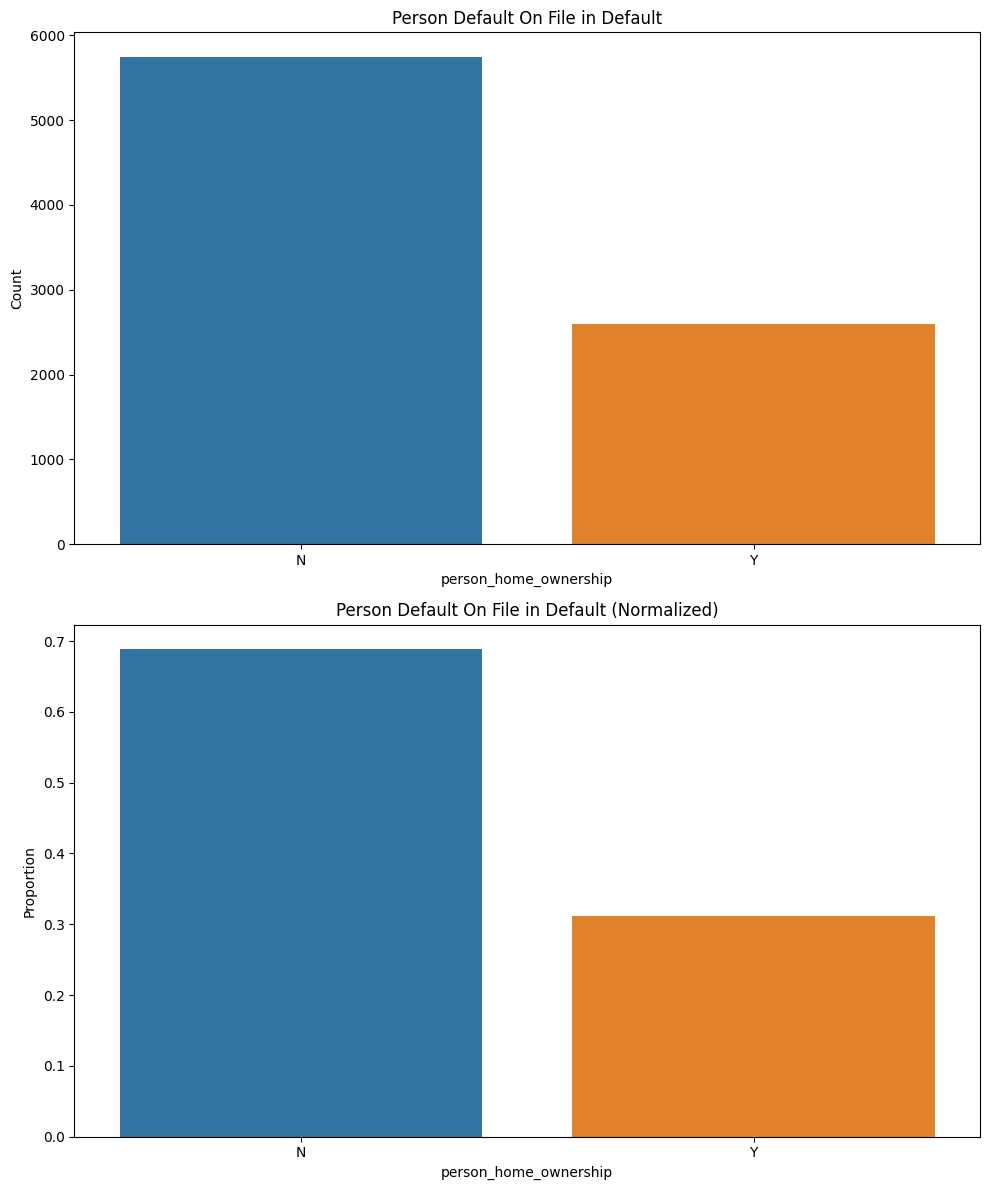

cb_person_default_on_file  count  propotion
0                         N   5749      68.85
1                         Y   2601      31.15

In [81]:
# Group the data for the first bar chart (loan_status == 1 - Default)
person_default_on_file_counts_default = df[df["loan_status"] == 1]["cb_person_default_on_file"].value_counts().reset_index()
person_default_on_file_counts_default.columns = ['cb_person_default_on_file', 'count']

# Group the data for the second bar chart (loan_status == 1 - Default)
person_default_on_file_counts_default_normalize = df[df["loan_status"] == 1]["cb_person_default_on_file"].value_counts(normalize=True).reset_index()
person_default_on_file_counts_default_normalize.columns = ['cb_person_default_on_file', 'proportion']

# Create a figure with two subplots (stacked vertically)
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 12))

# First plot: Loan Grade in Default
sns.barplot(x='cb_person_default_on_file', y='count', data=person_default_on_file_counts_default, ax=axes[0], hue='cb_person_default_on_file')
axes[0].set_title('Person Default On File in Default')
axes[0].set_ylabel('Count')
axes[0].set_xlabel('person_home_ownership')

# Second plot: Loan Grade in Default (Normalized)
sns.barplot(x='cb_person_default_on_file', y='proportion', data=person_default_on_file_counts_default_normalize, ax=axes[1], hue='cb_person_default_on_file')
axes[1].set_title('Person Default On File in Default (Normalized)')
axes[1].set_ylabel('Proportion')
axes[1].set_xlabel('person_home_ownership')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

number_of_person_default_on_file_in_default_group = pd.DataFrame(person_default_on_file_counts_default)

number_of_person_default_on_file_in_default_group["propotion"] = np.round(person_default_on_file_counts_default_normalize["proportion"] * 100, 2)

number_of_person_default_on_file_in_default_group

## Number of Not Default Loan (0) in each Person Default On File Status

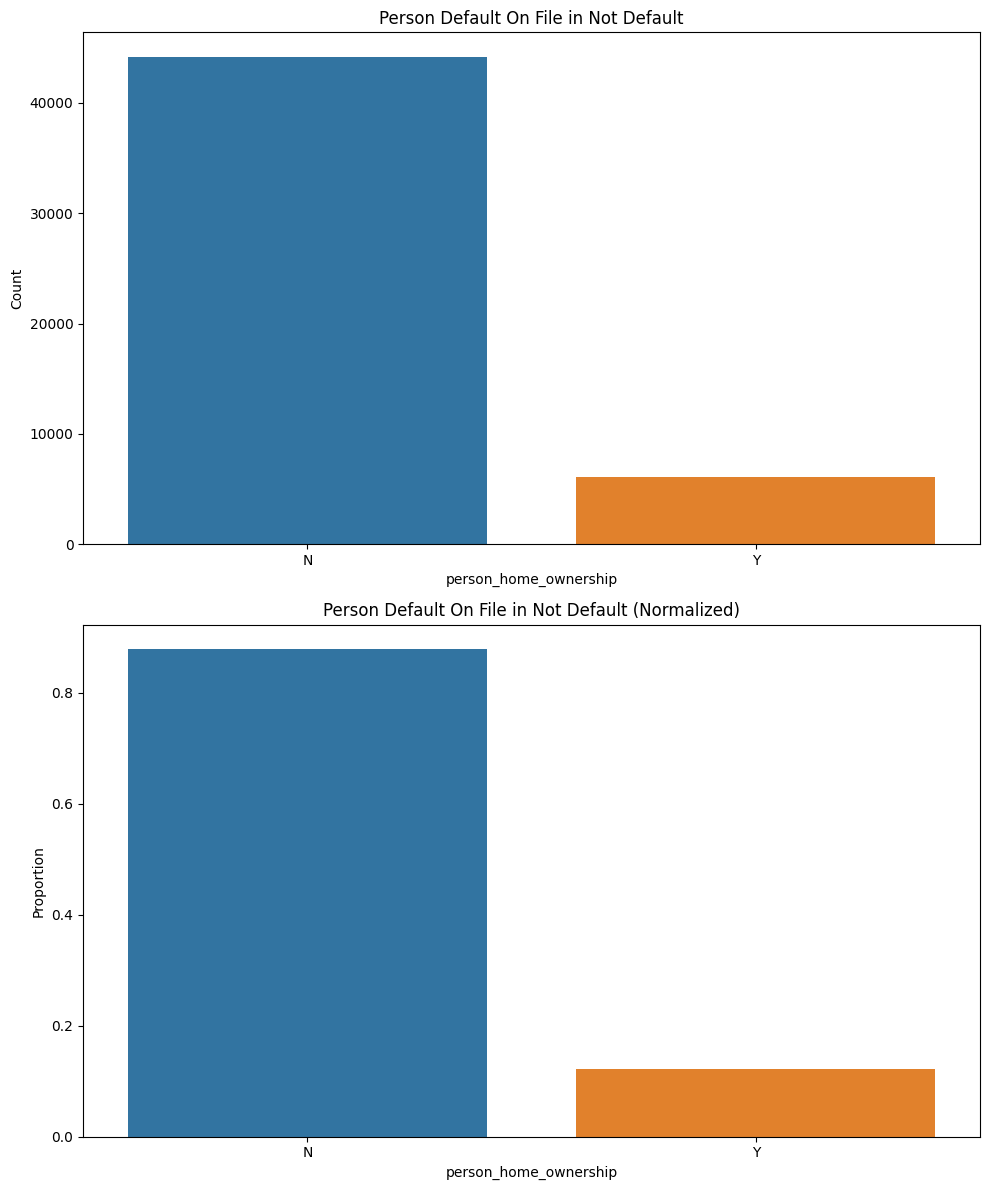

cb_person_default_on_file  count  propotion
0                         N  44194      87.87
1                         Y   6101      12.13

In [82]:
# Group the data for the first bar chart (loan_status == 1 - Not Default)
person_default_on_file_counts_not_default = df[df["loan_status"] == 0]["cb_person_default_on_file"].value_counts().reset_index()
person_default_on_file_counts_not_default.columns = ['cb_person_default_on_file', 'count']

# Group the data for the second bar chart (loan_status == 1 - Not Default)
person_default_on_file_counts_not_default_normalize = df[df["loan_status"] == 0]["cb_person_default_on_file"].value_counts(normalize=True).reset_index()
person_default_on_file_counts_not_default_normalize.columns = ['cb_person_default_on_file', 'proportion']

# Create a figure with two subplots (stacked vertically)
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 12))

# First plot: Loan Grade in Default
sns.barplot(x='cb_person_default_on_file', y='count', data=person_default_on_file_counts_not_default, ax=axes[0], hue='cb_person_default_on_file')
axes[0].set_title('Person Default On File in Not Default')
axes[0].set_ylabel('Count')
axes[0].set_xlabel('person_home_ownership')

# Second plot: Loan Grade in Default (Normalized)
sns.barplot(x='cb_person_default_on_file', y='proportion', data=person_default_on_file_counts_not_default_normalize, ax=axes[1], hue='cb_person_default_on_file')
axes[1].set_title('Person Default On File in Not Default (Normalized)')
axes[1].set_ylabel('Proportion')
axes[1].set_xlabel('person_home_ownership')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

number_of_person_default_on_file_in_not_default_group = pd.DataFrame(person_default_on_file_counts_not_default)

number_of_person_default_on_file_in_not_default_group["propotion"] = np.round(person_default_on_file_counts_not_default_normalize["proportion"] * 100, 2)

number_of_person_default_on_file_in_not_default_group

## Proportion between Default Loan (1) and Not Default Loan (0) in each Person Default On File Status

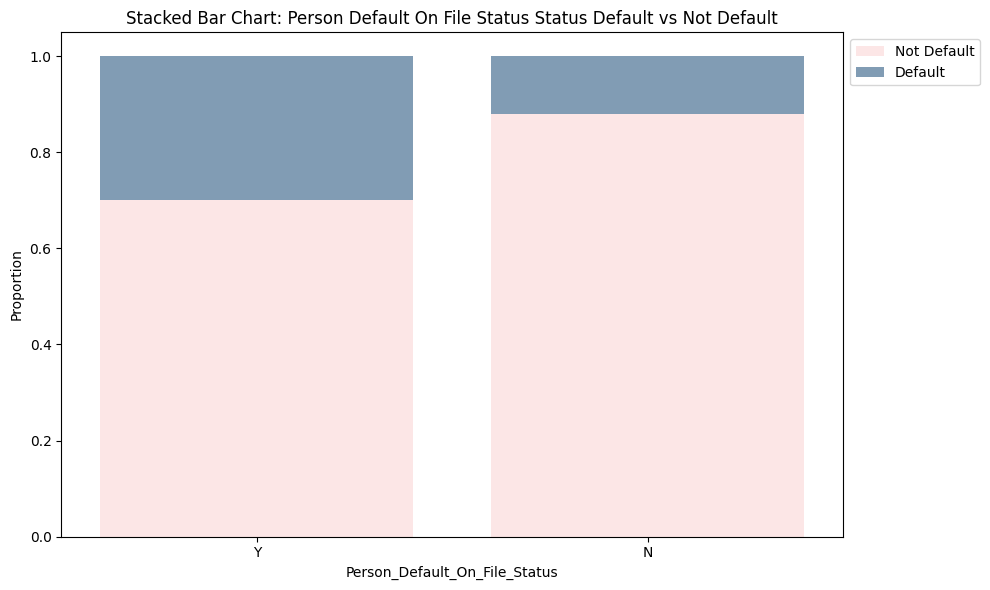

Person_Default_On_File_Status  Not_Default_Proportion  Default_Proportion  \
1                             Y                    0.70                0.30   
0                             N                    0.88                0.12   

   Total Count  
1         8702  
0        49943

In [83]:
# Calculate Default and Not Default proportion for each loan intent
proportion_list = []

# Get unique loan intent
person_default_on_file_list = df["cb_person_default_on_file"].unique()

for status in person_default_on_file_list :
    # Condition
    not_default_condition = (df["cb_person_default_on_file"] == status) & (df["loan_status"] == 0)
    default_condition = (df["cb_person_default_on_file"] == status) & (df["loan_status"] == 1)
    
    # Count default and not default for the given loan grade
    default_count = df[default_condition].shape[0]
    not_default_count = df[not_default_condition].shape[0]
    total = default_count + not_default_count

    if total > 0 :
        default_proportion = round((default_count / total), 2)
        not_default_proportion = round((not_default_count / total), 2)
    else :
        default_proportion = 0
        not_default_proportion = 0

    # Add proportion to the list
    proportion_list.append([status, not_default_proportion, default_proportion, total])

# Create a DataFrame for plotting
proportion_person_default_on_file_df = pd.DataFrame(proportion_list, columns= ["Person_Default_On_File_Status", "Not_Default_Proportion", "Default_Proportion", "Total Count"])

# Sort the DataFrame
proportion_person_default_on_file_df = proportion_person_default_on_file_df.sort_values(by= "Default_Proportion", ascending= False)

# Create the figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the first set of bars (default counts)
sns.barplot(x='Person_Default_On_File_Status', y='Not_Default_Proportion', data=proportion_person_default_on_file_df, color='#FFE3E3', label='Not Default', ax=ax)

# Plot the second set of bars (not default counts) on top of the first one, offset by the default counts
sns.barplot(x='Person_Default_On_File_Status', y='Default_Proportion', data=proportion_person_default_on_file_df, color='#789DBC', label='Default', ax=ax,
            bottom=proportion_person_default_on_file_df['Not_Default_Proportion'])

# Add labels and legend
ax.set_ylabel('Proportion')
ax.set_title('Stacked Bar Chart: Person Default On File Status Status Default vs Not Default')
ax.legend()

# Move the legend to the upper right, outside of the plot
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))

# Show the plot
plt.tight_layout()
plt.show()

proportion_person_default_on_file_df

## Distribution of Loan Amount in each Loan Intent

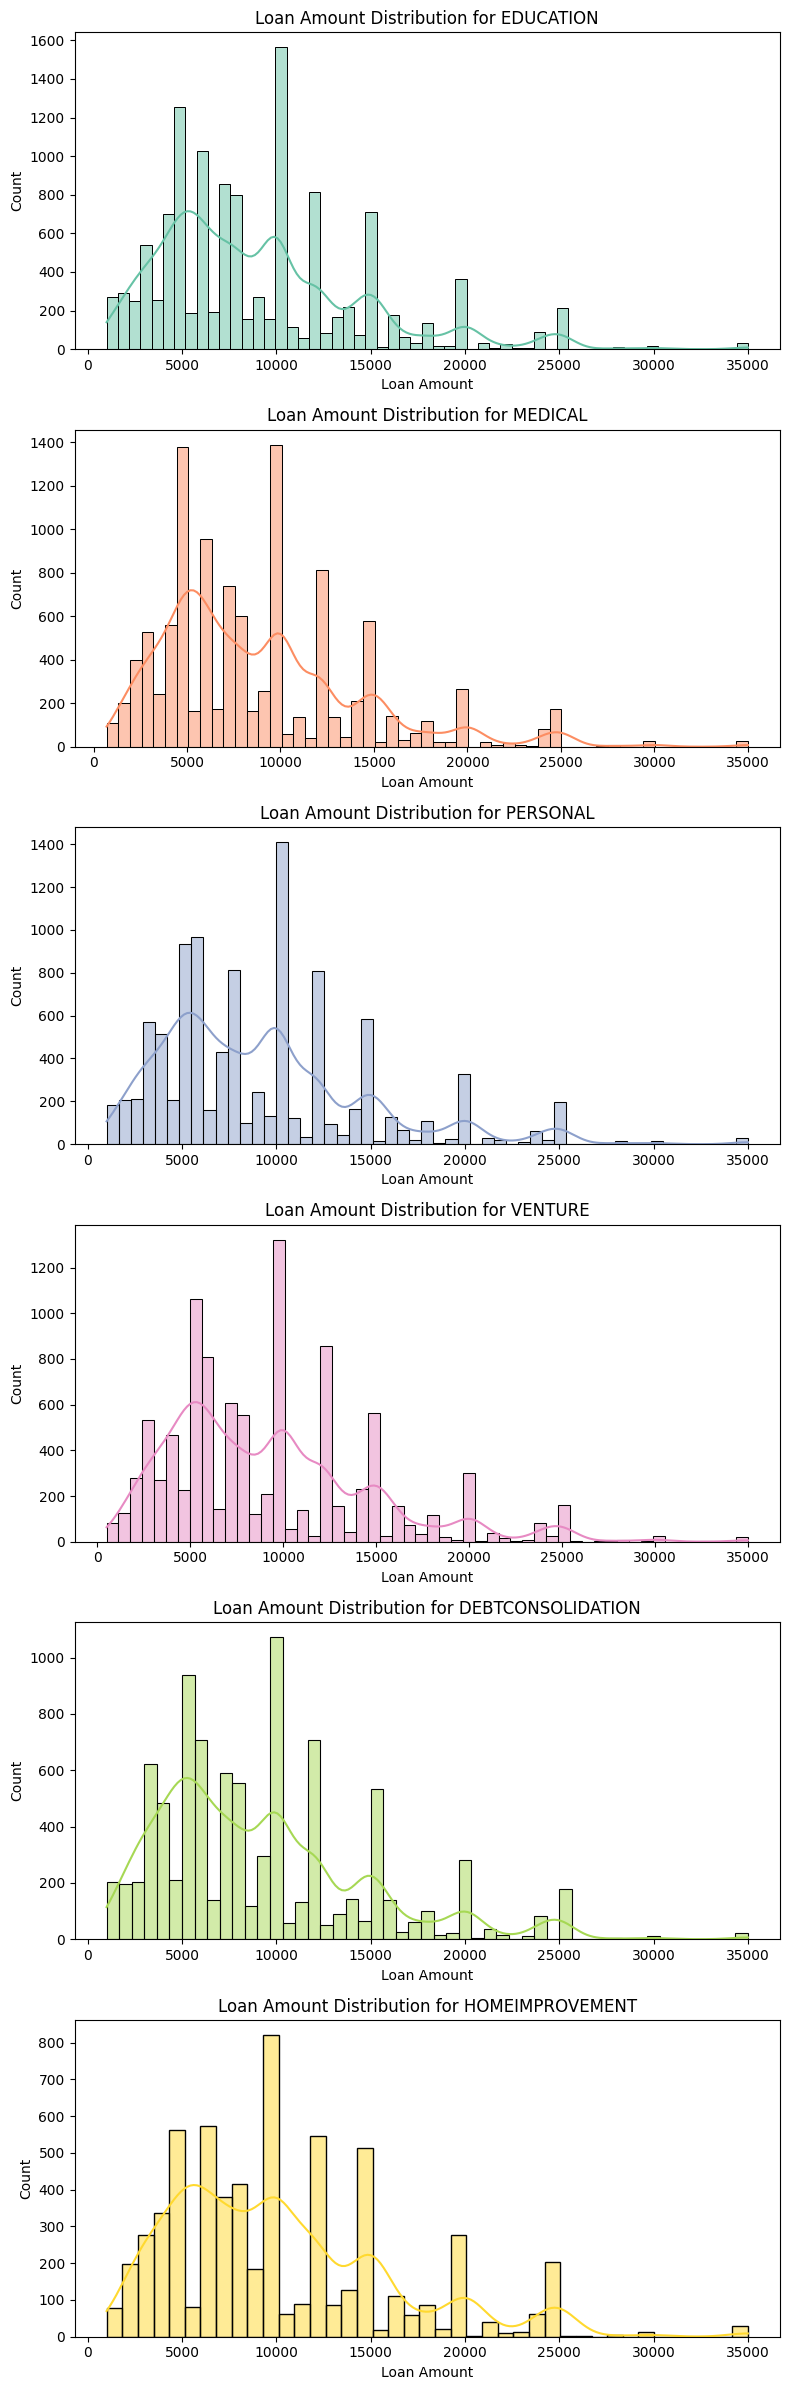

In [84]:
# Get the unique loan intents
loan_intents = df['loan_intent'].unique()

# Define a color palette (you can also use sns.color_palette() to generate colors)
colors = sns.color_palette("Set2", len(loan_intents))  # Using a Seaborn palette

# Create a figure with subplots (one subplot for each loan intent)
fig, axes = plt.subplots(nrows=len(loan_intents), ncols=1, figsize=(8, len(loan_intents) * 4))

# Ensure axes is always a list, even if there's only one subplot
if len(loan_intents) == 1:
    axes = [axes]

# Plot a separate histogram for each loan intent with a different color
for i, loan_intent in enumerate(loan_intents):
    # Filter data for the current loan intent
    subset = df[df['loan_intent'] == loan_intent]
    
    # Plot the histogram for loan amount with a different color for each loan intent
    sns.histplot(subset['loan_amnt'], ax=axes[i], kde=True, color=colors[i])
    
    # Set the title and labels for each subplot
    axes[i].set_title(f'Loan Amount Distribution for {loan_intent}')
    axes[i].set_xlabel('Loan Amount')
    axes[i].set_ylabel('Count')

# Adjust layout to prevent overlapping subplots
plt.tight_layout()

# Show the plot
plt.show()

## Distribution of Loan Amount in each Loan Grade

In [85]:
# Get the unique loan intents
loan_grades = df['loan_grade'].unique()

# Define a color palette (you can also use sns.color_palette() to generate colors)
colors = sns.color_palette("Set2", len(loan_grades))  

# Create a figure with subplots (one subplot for each loan intent)
fig, axes = plt.subplots(nrows=len(loan_grades), ncols=1, figsize=(8, len(loan_grades) * 4))

# Ensure axes is always a list, even if there's only one subplot
if len(loan_grades) == 1:
    axes = [axes]

# Plot a separate histogram for each loan intent with a different color
for i, loan_grade in enumerate(loan_grades):
    # Filter data for the current loan intent
    subset = df[df['loan_grade'] == loan_grade]
    
    # Plot the histogram for loan amount with a different color for each loan intent
    sns.histplot(subset['loan_amnt'], ax=axes[i], kde=True, color=colors[i])
    
    # Set the title and labels for each subplot
    axes[i].set_title(f'Loan Amount Distribution for {loan_grade}')
    axes[i].set_xlabel('Loan Amount')
    axes[i].set_ylabel('Count')

# Adjust layout to prevent overlapping subplots
plt.tight_layout()

# Show the plot
plt.show()

## Boxplot of the Interest Rate in each Loan Intent

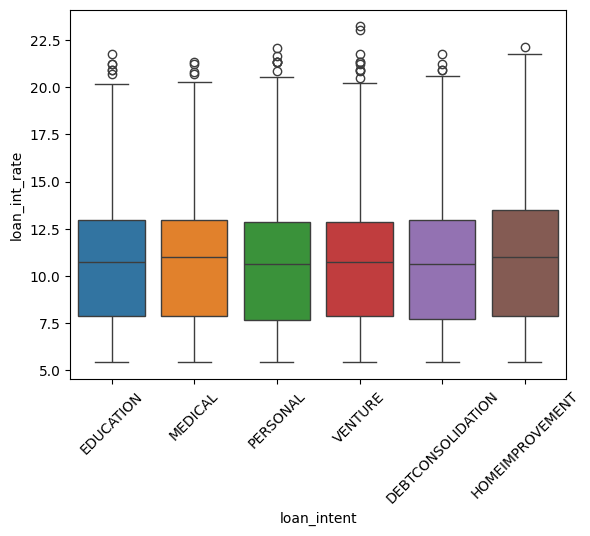

loan_intent  Interest_Rate_Median
0  DEBTCONSOLIDATION                 10.65
1          EDUCATION                 10.75
2    HOMEIMPROVEMENT                 10.99
3            MEDICAL                 10.99
4           PERSONAL                 10.65
5            VENTURE                 10.74

In [86]:
sns.boxplot(df, x= "loan_intent", y= "loan_int_rate", hue= "loan_intent")

plt.xticks(rotation= 45)

plt.show()

df.groupby("loan_intent", as_index= False)["loan_int_rate"].agg(Interest_Rate_Median="median")

## Boxplot of Loan Interest Rate in each Loan Status

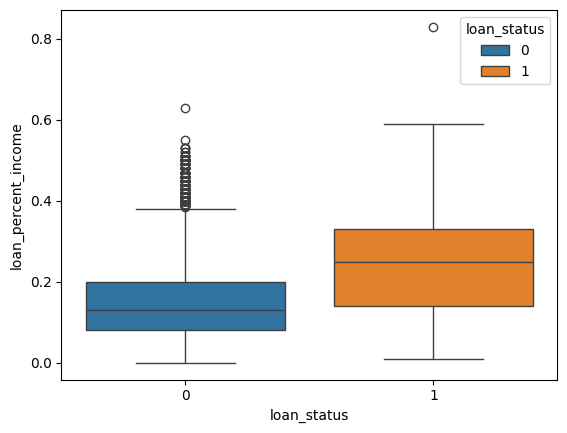

loan_status  Interest_Rate_Median
0            0                  0.13
1            1                  0.25

In [87]:
sns.boxplot(df, x= "loan_status", y= "loan_percent_income", hue= "loan_status")

plt.show()

df.groupby("loan_status", as_index= False)["loan_percent_income"].agg(Interest_Rate_Median="median")


# Step 4 : Classifier Model

## Define Training and Test Dataset

### Training Dataset

In [88]:
X_train = preprocess_train_df.copy()

X_train.shape

(58643, 46)

In [89]:
y_train = loan_status_df

y_train

0        False
1        False
2        False
3        False
4        False
         ...  
58640    False
58641     True
58642     True
58643    False
58644    False
Name: loan_status, Length: 58643, dtype: bool

#### Test Dataset

In [90]:
X_test = preprocess_test_df.copy()

X_test.shape

(39098, 46)

## Set up K-Fold Cross-Validation

In [91]:
# Set up K-Fold for performing cross validation
kf = KFold(n_splits= 3, shuffle= True, random_state= 100)

## Logistic Regression

In [152]:
# Set up Logistic Regression Model
logreg = LogisticRegression()

# Hyper Parameter Tuning Grid
param_grid = {
    "C": np.arange(20, 25, 0.1),
    "penalty" : ["l1", "l2"],
    "solver" : ["liblinear"],
    "max_iter" : np.arange(500, 800, 100)
}

logreg_search = GridSearchCV(
                                estimator= logreg,
                                param_grid= param_grid,
                                cv = kf,
                                verbose= 1)

logreg_search.fit(X_train, y_train)

# Best parameters and best score
print(f"Best Parameters: {logreg_search.best_params_}")
print(f"Best Cross-Validation Accuracy: {logreg_search.best_score_:.2f}")

Fitting 3 folds for each of 300 candidates, totalling 900 fits
Best Parameters: {'C': np.float64(24.90000000000007), 'max_iter': np.int64(700), 'penalty': 'l1', 'solver': 'liblinear'}
Best Cross-Validation Accuracy: 0.91


In [153]:
# Get best model
best_model_1 = logreg_search.best_estimator_
best_model_1

LogisticRegression(C=np.float64(24.90000000000007), max_iter=np.int64(700),
                   penalty='l1', solver='liblinear')

In [154]:
best_model_1.score(X_train, y_train)

0.9123851099022902

In [155]:
cv_scores = cross_val_score(best_model_1, X_train, y_train, cv=10, scoring='accuracy')

cv_scores

array([0.914237  , 0.90912191, 0.91133845, 0.90774216, 0.91558663,
       0.91217599, 0.91149386, 0.91592769, 0.91149386, 0.91302865])

In [156]:
y_train_pred = best_model_1.predict(X_train)

report = classification_report(y_train, y_train_pred)
con_matrix = confusion_matrix(y_train, y_train_pred)

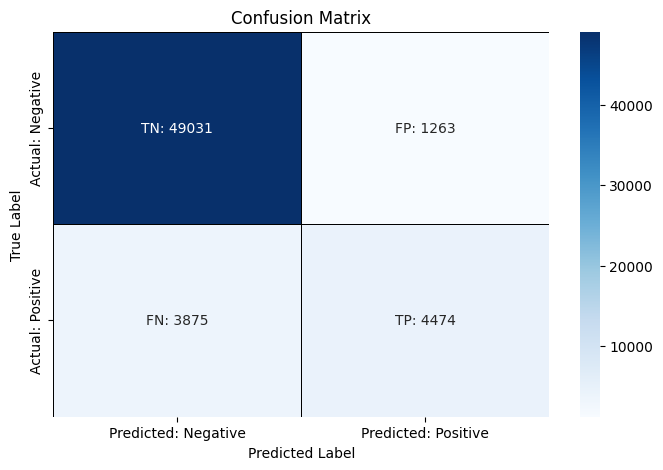

In [157]:
# Define labels with TN, FP, FN, TP, combined with the actual values
labels = [["TN: {}".format(con_matrix[0, 0]), "FP: {}".format(con_matrix[0, 1])],
          ["FN: {}".format(con_matrix[1, 0]), "TP: {}".format(con_matrix[1, 1])]]

# Plot heatmap with combined labels
plt.figure(figsize=(8, 5))
sns.heatmap(con_matrix, annot=labels, fmt="", cmap="Blues", cbar=True,
            xticklabels=["Predicted: Negative", "Predicted: Positive"], 
            yticklabels=["Actual: Negative", "Actual: Positive"],
            linecolor="black", linewidths=0.5)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

In [158]:
print("Classification Report :")
print(report)

Classification Report :
              precision    recall  f1-score   support

       False       0.93      0.97      0.95     50294
        True       0.78      0.54      0.64      8349

    accuracy                           0.91     58643
   macro avg       0.85      0.76      0.79     58643
weighted avg       0.91      0.91      0.91     58643



In [159]:
prediction_prob_1 = best_model_1.decision_function(X_test)

prediction_prob_1

array([ 2.62218241, -4.681907  , -0.08384585, ..., -2.50214941,
        2.47955707,  1.12567993])

In [160]:
prediction_1 = best_model_1.predict(X_test)

prediction_1

array([ True, False, False, ..., False,  True,  True])

In [161]:
test_df_id = pd.read_csv("test.csv")

model_1_prediction = pd.DataFrame({"id" : test_df_id["id"], "prediction" : prediction_1})

model_1_prediction.columns = ["id", "loan_status"]

model_1_prediction["loan_status"] = model_1_prediction["loan_status"].astype(int)

model_1_prediction

id  loan_status
0      58645            1
1      58646            0
2      58647            0
3      58648            0
4      58649            0
...      ...          ...
39093  97738            0
39094  97739            0
39095  97740            0
39096  97741            1
39097  97742            1

[39098 rows x 2 columns]

## Random Forest Classifier

In [162]:
# Set up the machine learning model (Random Forest Classifier)
rfc = RandomForestClassifier()

# Indicate the searching area for tuning the model
params = {
    "n_estimators" : np.arange(500, 650, 50),
    "max_depth" : np.arange(120, 150, 10),
    "min_samples_split" : [0.1],
    "min_samples_leaf" : [1, 2],
    "max_features" : ["log2"],
    "bootstrap" : [False]
}

# Set up RandomizedSearchCV for tuning the model
random_search = GridSearchCV(
                            estimator= rfc,
                            param_grid= params,
                            cv = kf,
                            verbose= 1
)

# Tuning the model
random_search.fit(X_train, y_train)

# Best parameters and best score
print(f"Best Parameters: {random_search.best_params_}")
print(f"Best Cross-Validation Accuracy: {random_search.best_score_:.2f}")

Fitting 3 folds for each of 18 candidates, totalling 54 fits
Best Parameters: {'bootstrap': False, 'max_depth': np.int64(130), 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 0.1, 'n_estimators': np.int64(500)}
Best Cross-Validation Accuracy: 0.91


In [163]:
# Get best model
best_model_2 = random_search.best_estimator_
best_model_2

RandomForestClassifier(bootstrap=False, max_depth=np.int64(130),
                       max_features='log2', min_samples_split=0.1,
                       n_estimators=np.int64(500))

In [164]:
cv_scores_2 = cross_val_score(best_model_2, X_train, y_train, cv=10, scoring='accuracy')

cv_scores_2

array([0.9028133 , 0.9026428 , 0.89360614, 0.90194407, 0.90126194,
       0.90194407, 0.90228513, 0.90825375, 0.9058663 , 0.90535471])

In [165]:
y_train_pred = best_model_2.predict(X_train)

report = classification_report(y_train, y_train_pred)
con_matrix = confusion_matrix(y_train, y_train_pred)

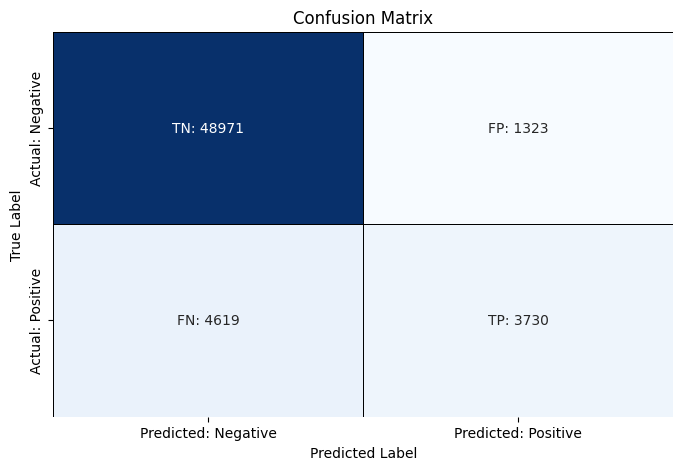

In [166]:
# Define labels with TN, FP, FN, TP, combined with the actual values
labels = [["TN: {}".format(con_matrix[0, 0]), "FP: {}".format(con_matrix[0, 1])],
          ["FN: {}".format(con_matrix[1, 0]), "TP: {}".format(con_matrix[1, 1])]]

# Plot heatmap with combined labels
plt.figure(figsize=(8, 5))
sns.heatmap(con_matrix, annot=labels, fmt="", cmap="Blues", cbar=False,
            xticklabels=["Predicted: Negative", "Predicted: Positive"], 
            yticklabels=["Actual: Negative", "Actual: Positive"],
            linecolor="black", linewidths=0.5)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

In [167]:
print("Classification Report :")
print(report)

Classification Report :
              precision    recall  f1-score   support

       False       0.91      0.97      0.94     50294
        True       0.74      0.45      0.56      8349

    accuracy                           0.90     58643
   macro avg       0.83      0.71      0.75     58643
weighted avg       0.89      0.90      0.89     58643



In [168]:
prediction_2 = best_model_2.predict(X_test)

prediction_2

array([ True, False,  True, ..., False,  True, False])

In [169]:
model_2_prediction = pd.DataFrame({"id" : test_df_id["id"], "loan_status" : prediction_2})

model_2_prediction["loan_status"] = model_2_prediction["loan_status"].astype(int)

model_2_prediction.to_csv("prediction.csv", index= False)

model_2_prediction

id  loan_status
0      58645            1
1      58646            0
2      58647            1
3      58648            0
4      58649            0
...      ...          ...
39093  97738            0
39094  97739            0
39095  97740            0
39096  97741            1
39097  97742            0

[39098 rows x 2 columns]

In [170]:
# # Get the most important features for predicting the target variables
# features_importances = best_model_2.feature_importances_
# features = explore_df.columns

# # Create a DataFrame
# importance_df = pd.DataFrame({"Feature": features, "Importance": features_importances})

# # Round the importance values to 2 decimal places
# importance_df['Importance'] = importance_df['Importance'].round(5)

# # Sort the DataFrame by importance
# importance_df = importance_df.sort_values(by='Importance', ascending=False)

# # Display the rounded DataFrame
# importance_df.head(10)

In [171]:
# # Create a custom single-color (blue) diverging scale
# single_blue_diverging = ['#e0f7fa', '#81d4fa', '#29b6f6', '#039be5', '#01579b']

# # Create a Plotly bar chart with a single-color blue diverging scale
# fig = px.bar(importance_df, 
#              x='Importance', 
#              y='Feature', 
#              color='Importance',  # Color by importance
#              color_continuous_scale=single_blue_diverging,  # Custom blue scale
#              orientation='h',  # Horizontal bars
#              title='Feature Importance (Single Blue Diverging)')

# # Add borderlines around each bar
# fig.update_traces(marker=dict(line=dict(color='black', width=2)))  # Borderline color and width

# # Adjust layout
# fig.update_layout(
#     yaxis={'categoryorder':'total ascending'},  # Sort by importance
#     width=950,  # Set figure width
#     height=950  # Set figure height
# )

# # Display the chart
# fig.show()


In [172]:
best_model_2.score(X_train, y_train)

0.8986750336783589

## K-Nearest Neighbor (KNN)

In [173]:
knn = KNeighborsClassifier()

knn_params = {"n_neighbors" : np.arange(10, 100, 5)}

grid_cv = GridSearchCV(
                        estimator = knn,
                        param_grid= knn_params,
                        verbose = 1,
                        cv = kf
)

grid_cv.fit(X_train, y_train)

# Best parameters and best score
print(f"Best Parameters: {grid_cv.best_params_}")
print(f"Best Cross-Validation Accuracy: {grid_cv.best_score_:.2f}")

Fitting 3 folds for each of 18 candidates, totalling 54 fits
Best Parameters: {'n_neighbors': np.int64(25)}
Best Cross-Validation Accuracy: 0.93


In [174]:
# Get best model
best_model_3 = grid_cv.best_estimator_
best_model_3

KNeighborsClassifier(n_neighbors=np.int64(25))

In [175]:
best_model_3.score(X_train, y_train)

0.9339051549204509

In [176]:
cv_scores_3 = cross_val_score(best_model_3, X_train, y_train, cv=10, scoring='accuracy')

cv_scores_3

array([0.93026428, 0.92395567, 0.93435635, 0.93127558, 0.92974079,
       0.92803547, 0.93178718, 0.93400409, 0.9334925 , 0.92854707])

In [177]:
y_train_pred = best_model_3.predict(X_train)

report = classification_report(y_train, y_train_pred)
con_matrix = confusion_matrix(y_train, y_train_pred)

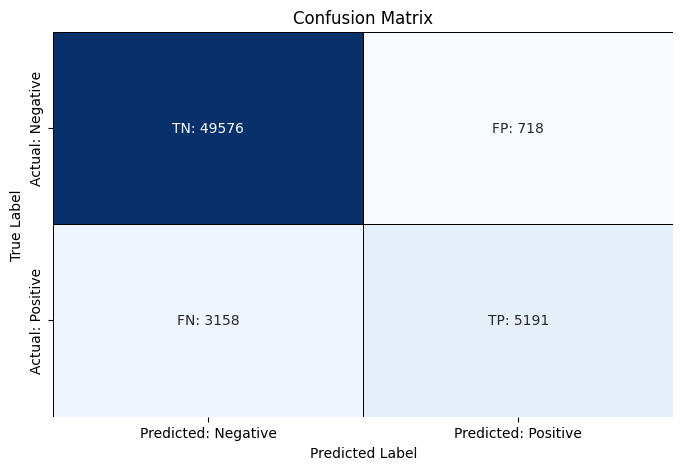

In [178]:
# Define labels with TN, FP, FN, TP, combined with the actual values
labels = [["TN: {}".format(con_matrix[0, 0]), "FP: {}".format(con_matrix[0, 1])],
          ["FN: {}".format(con_matrix[1, 0]), "TP: {}".format(con_matrix[1, 1])]]

# Plot heatmap with combined labels
plt.figure(figsize=(8, 5))
sns.heatmap(con_matrix, annot=labels, fmt="", cmap="Blues", cbar=False,
            xticklabels=["Predicted: Negative", "Predicted: Positive"], 
            yticklabels=["Actual: Negative", "Actual: Positive"],
            linecolor="black", linewidths=0.5)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

In [179]:
print("Classification Report :")
print(report)

Classification Report :
              precision    recall  f1-score   support

       False       0.94      0.99      0.96     50294
        True       0.88      0.62      0.73      8349

    accuracy                           0.93     58643
   macro avg       0.91      0.80      0.85     58643
weighted avg       0.93      0.93      0.93     58643



In [180]:
prediction_3 = best_model_3.predict(X_test)

prediction_3

array([ True, False,  True, ..., False,  True,  True])

In [181]:
model_3_prediction = pd.DataFrame({"id" : test_df_id["id"], "loan_status" : prediction_3})

model_3_prediction["loan_status"] = model_3_prediction["loan_status"].astype(int)

model_3_prediction

id  loan_status
0      58645            1
1      58646            0
2      58647            1
3      58648            0
4      58649            0
...      ...          ...
39093  97738            0
39094  97739            0
39095  97740            0
39096  97741            1
39097  97742            1

[39098 rows x 2 columns]

## XGBoost

In [182]:
# Parameter grid for RandomizedSearchCV
param_grid = {
    'n_estimators': np.arange(50, 1000, 50),
    'learning_rate': np.arange(0.01, 0.5, 0.05),
    'max_depth': np.arange(5, 15, 2),
    'subsample': np.arange(0.5, 1, 0.05),
    'colsample_bytree': np.arange(0.5, 1, 0.05),
    'gamma': np.arange(0, 0.5, 0.05),
    'reg_alpha': np.arange(0, 1, 0.1),
    'reg_lambda': np.arange(0, 3, 0.5),
}

# Initialize XGBoost model
xgb_model = XGBClassifier()

# Set up RandomizedSearchCV
randomized_search = RandomizedSearchCV(
    estimator= xgb_model,
    param_distributions= param_grid,
    n_iter= 1000,  # Number of parameter combinations to try
    scoring= 'accuracy',
    cv= kf,  # Cross-validation
    random_state=42,
)

# Fit the model
randomized_search.fit(X_train, y_train)

# Print best parameters and score
print("Best Parameters: ", randomized_search.best_params_)
print("Best Score: ", randomized_search.best_score_)

# Get the best model
best_xgb_model = randomized_search.best_estimator_

Best Parameters:  {'subsample': np.float64(0.5), 'reg_lambda': np.float64(1.0), 'reg_alpha': np.float64(0.7000000000000001), 'n_estimators': np.int64(200), 'max_depth': np.int64(7), 'learning_rate': np.float64(0.060000000000000005), 'gamma': np.float64(0.0), 'colsample_bytree': np.float64(0.5)}
Best Score:  0.950718726463588


In [183]:
best_xgb_model.score(X_train, y_train)

0.9551523626008219

In [184]:
cv_scores_4 = cross_val_score(best_xgb_model, X_train, y_train, cv=10, scoring='accuracy')

cv_scores_4

array([0.94970162, 0.94646206, 0.94919011, 0.95139836, 0.95003411,
       0.94866985, 0.95344475, 0.95549113, 0.95122783, 0.95088677])

In [185]:
y_train_pred = best_xgb_model.predict(X_train)

report = classification_report(y_train, y_train_pred)
con_matrix = confusion_matrix(y_train, y_train_pred)

In [186]:
# Define labels with TN, FP, FN, TP, combined with the actual values
labels = [["TN: {}".format(con_matrix[0, 0]), "FP: {}".format(con_matrix[0, 1])],
          ["FN: {}".format(con_matrix[1, 0]), "TP: {}".format(con_matrix[1, 1])]]

# Plot heatmap with combined labels
plt.figure(figsize=(8, 5))
sns.heatmap(con_matrix, annot=labels, fmt="", cmap="Blues", cbar=False,
            xticklabels=["Predicted: Negative", "Predicted: Positive"], 
            yticklabels=["Actual: Negative", "Actual: Positive"],
            linecolor="black", linewidths=0.5)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

In [187]:
print("Classification Report :")
print(report)

Classification Report :
              precision    recall  f1-score   support

       False       0.96      0.99      0.97     50294
        True       0.93      0.74      0.82      8349

    accuracy                           0.96     58643
   macro avg       0.94      0.87      0.90     58643
weighted avg       0.95      0.96      0.95     58643



In [188]:
# Make predictions
prediction_4 = best_xgb_model.predict(X_test)

prediction_4

array([1, 0, 1, ..., 0, 0, 1])

In [189]:
model_4_prediction = pd.DataFrame({"id" : test_df_id["id"], "loan_status" : prediction_4})

model_4_prediction["loan_status"] = model_4_prediction["loan_status"].astype(int)

model_4_prediction.to_csv("prediction.csv", index= False)

model_4_prediction

id  loan_status
0      58645            1
1      58646            0
2      58647            1
3      58648            0
4      58649            0
...      ...          ...
39093  97738            0
39094  97739            0
39095  97740            0
39096  97741            0
39097  97742            1

[39098 rows x 2 columns]

In [190]:
# Convert X_train.columns to a list
feature_names = list(explore_df.columns)

# Set the feature names in the booster object
best_xgb_model.get_booster().feature_names = feature_names

# Plot the importance again
plot_importance(best_xgb_model)
plt.show()

XGBoostError: [22:58:48] /Users/runner/work/xgboost/xgboost/src/c_api/c_api_utils.h:238: Check failed: feature_names.size() == n_features (56 vs. 46) : Incorrect number of feature names.
Stack trace:
  [bt] (0) 1   libxgboost.dylib                    0x000000017463858c dmlc::LogMessageFatal::~LogMessageFatal() + 124
  [bt] (1) 2   libxgboost.dylib                    0x00000001746c0320 xgboost::GenerateFeatureMap(xgboost::Learner const*, std::__1::vector<xgboost::Json, std::__1::allocator<xgboost::Json>> const&, unsigned long, xgboost::FeatureMap*) + 864
  [bt] (2) 3   libxgboost.dylib                    0x00000001746c2820 XGBoosterFeatureScore + 1504
  [bt] (3) 4   libffi.8.dylib                      0x0000000104f0804c ffi_call_SYSV + 76
  [bt] (4) 5   libffi.8.dylib                      0x0000000104f05834 ffi_call_int + 1404
  [bt] (5) 6   _ctypes.cpython-311-darwin.so       0x0000000104f30988 _ctypes_callproc + 1208
  [bt] (6) 7   _ctypes.cpython-311-darwin.so       0x0000000104f2ac10 PyCFuncPtr_call + 1188
  [bt] (7) 8   python3.11                          0x00000001042984ec _PyObject_MakeTpCall + 332
  [bt] (8) 9   python3.11                          0x000000010439a83c _PyEval_EvalFrameDefault + 46152

